In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("C:\\Users\\lsj32\\Desktop\\DSL\\DSL_2\\EDA\\키워드분석\\youtube_nodouble.csv",lineterminator='\n')
df_2017 = pd.read_csv("C:\\Users\\lsj32\\Desktop\\DSL\\DSL_2\\EDA\\키워드분석\\youtube_2017.csv",lineterminator='\n')
df_us = pd.read_csv("C:\\Users\\lsj32\\Desktop\\DSL\\DSL_2\\EDA\\키워드분석\\youtubeUS.csv",lineterminator='\n')

df_unique = pd.read_csv("C:\\Users\\lsj32\\Desktop\\DSL\\DSL_2\\EDA\\키워드분석\\youtube_nodouble_unique.csv",lineterminator='\n')
df_2017_unique = pd.read_csv("C:\\Users\\lsj32\\Desktop\\DSL\\DSL_2\\EDA\\키워드분석\\youtube_2017unique.csv",lineterminator='\n')
df_us_unique = pd.read_csv("C:\\Users\\lsj32\\Desktop\\DSL\\DSL_2\\EDA\\키워드분석\\youtube_USunique.csv",lineterminator='\n')

In [3]:
df['trending_date'] = pd.to_datetime(df['trending_date'])
df['publishedAt'] = pd.to_datetime(df['publishedAt'])
df_2017['trending_date'] = pd.to_datetime(df_2017['trending_date'])
df_2017['publishedAt'] = pd.to_datetime(df_2017['publishedAt'])
df_us['trending_date'] = pd.to_datetime(df_us['trending_date'])
df_us['publishedAt'] = pd.to_datetime(df_us['publishedAt'])
df_unique['trending_date'] = pd.to_datetime(df_unique['trending_date'])
df_unique['publishedAt'] = pd.to_datetime(df_unique['publishedAt'])
df_2017_unique['trending_date'] = pd.to_datetime(df_2017_unique['trending_date'])
df_2017_unique['publishedAt'] = pd.to_datetime(df_2017_unique['publishedAt'])
df_us_unique['trending_date'] = pd.to_datetime(df_us_unique['trending_date'])
df_us_unique['publishedAt'] = pd.to_datetime(df_us_unique['publishedAt'])

In [4]:
import matplotlib.font_manager as fm
path = 'C:\\Users\\lsj32\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumBarunGothic.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumBarunGothic


인기동영상들의 특징을 찾았는데, 어떤 내용인지도 궁금해진다. 따라서 '키워드'가 뭔지 알아보고자 했다.

# 1. 일변량 확인

## 1) 카테고리 분포

### (1) 원래 데이터

In [12]:
cat = df.groupby('category_name',as_index=False)['video_id'].count()
cat['ratio'] = cat['video_id'].div(len(df)/100)
cat_sort = cat.sort_values('ratio',ascending = False)

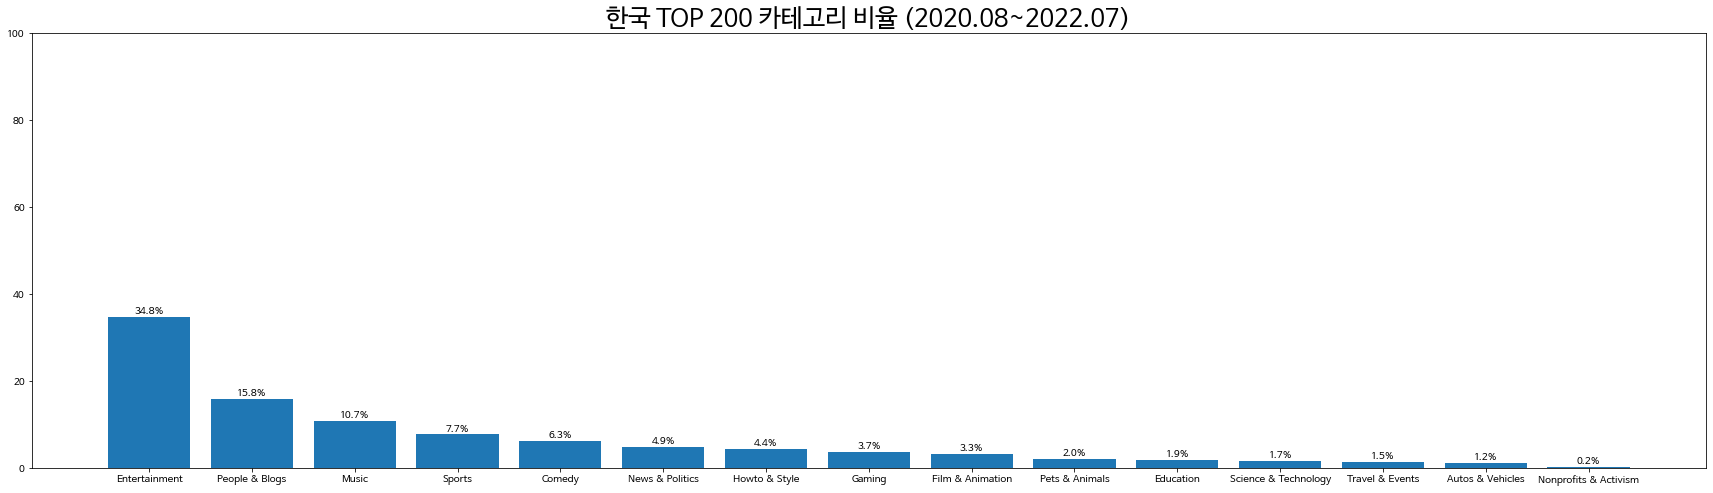

In [25]:
plt.figure(figsize=(30,8))
x = np.arange(len(cat_sort.category_name.unique()))
a = plt.bar(x, height = cat_sort['ratio']) #color= #edgecolot = 
plt.xticks(x, cat_sort['category_name'], fontsize = 10)
plt.title('한국 TOP 200 카테고리 비율 (2020.08~2022.07)',fontsize = 25)
plt.ylim([0,100])
for rect in a:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f%%' % height, ha='center', va='bottom', size = 10)
plt.show()

In [29]:
cat = df_unique.groupby('category_name',as_index=False)['video_id'].count()
cat['ratio'] = cat['video_id'].div(len(df_unique)/100)
cat_sort = cat.sort_values('ratio',ascending = False)

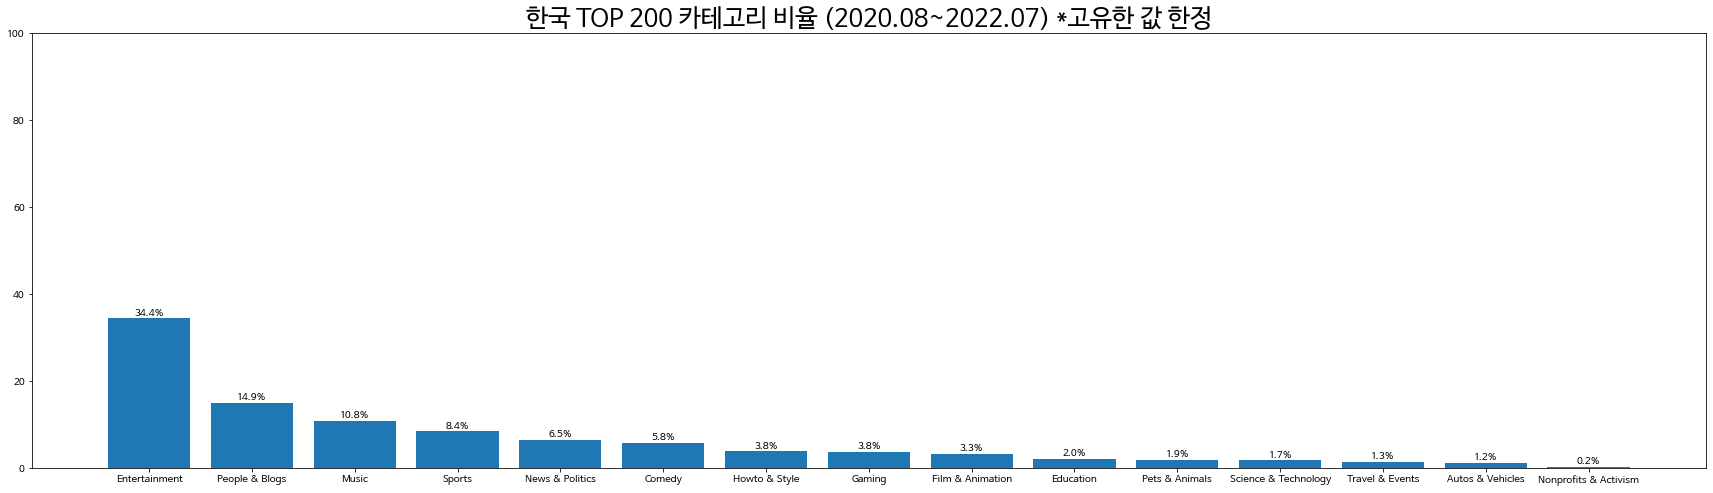

In [30]:
plt.figure(figsize=(30,8))
x = np.arange(len(cat_sort.category_name.unique()))
a = plt.bar(x, height = cat_sort['ratio']) #color= #edgecolot = 
plt.xticks(x, cat_sort['category_name'], fontsize = 10)
plt.title('한국 TOP 200 카테고리 비율 (2020.08~2022.07) *고유한 값 한정',fontsize = 25)
plt.ylim([0,100])
for rect in a:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f%%' % height, ha='center', va='bottom', size = 10)
plt.show()

엔터테인먼트가 독보적으로 많고, people&blogs가 그 다음.
저절로 뉴스, science 카테고리가 period가 짧다는 것을 알 수 있음. (전체 데이터와 비교했을 때.)

### 2017.11~2018.06 데이터

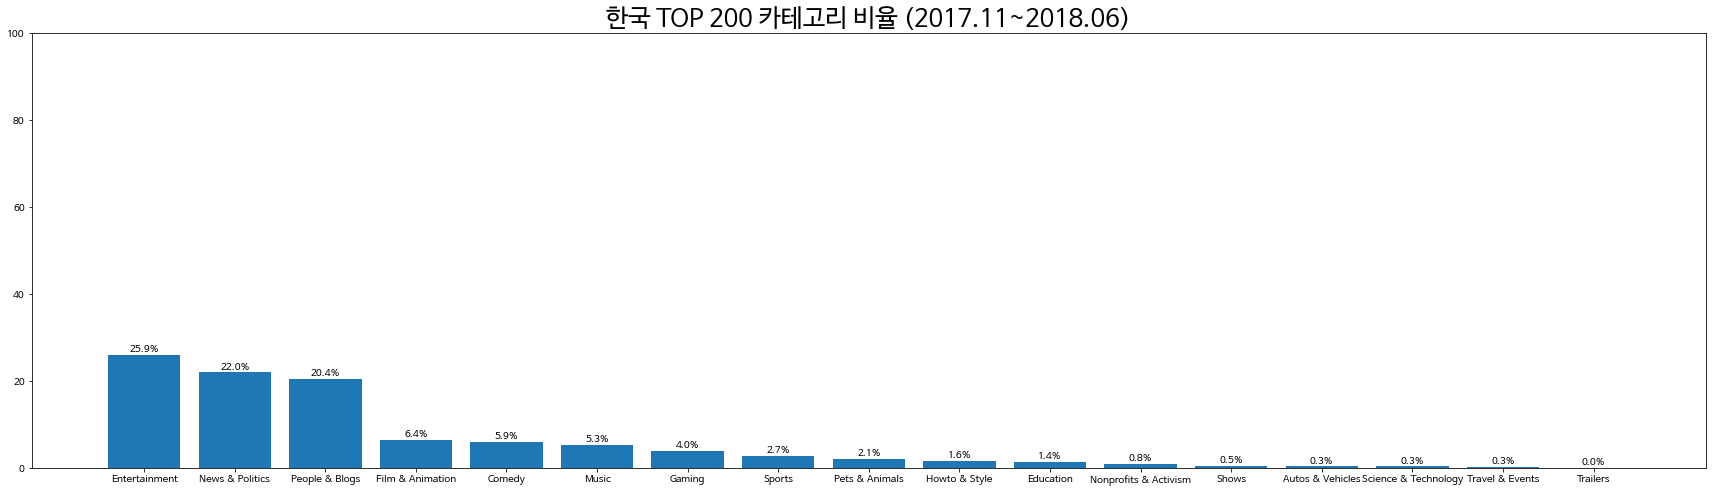

In [42]:
cat = df_2017.groupby('category_name',as_index=False)['video_id'].count()
cat['ratio'] = cat['video_id'].div(len(df_2017)/100)
cat_sort = cat.sort_values('ratio',ascending = False)

plt.figure(figsize=(30,8))
x = np.arange(len(cat_sort.category_name.unique()))
a = plt.bar(x, height = cat_sort['ratio']) #color= #edgecolot = 
plt.xticks(x, cat_sort['category_name'], fontsize = 10)
plt.title('한국 TOP 200 카테고리 비율 (2017.11~2018.06)',fontsize = 25)
plt.ylim([0,100])
for rect in a:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f%%' % height, ha='center', va='bottom', size = 10)
plt.show()

오 이때는 뉴스 politics가 많았네요. 그리고 trailer, shows는 첫등장인 듯함 (이거 빼고 보여줘야 하나?)
그리고 2020년 돼서 음악과 스포츠 카테고리가 더 많이 올라갔네요.

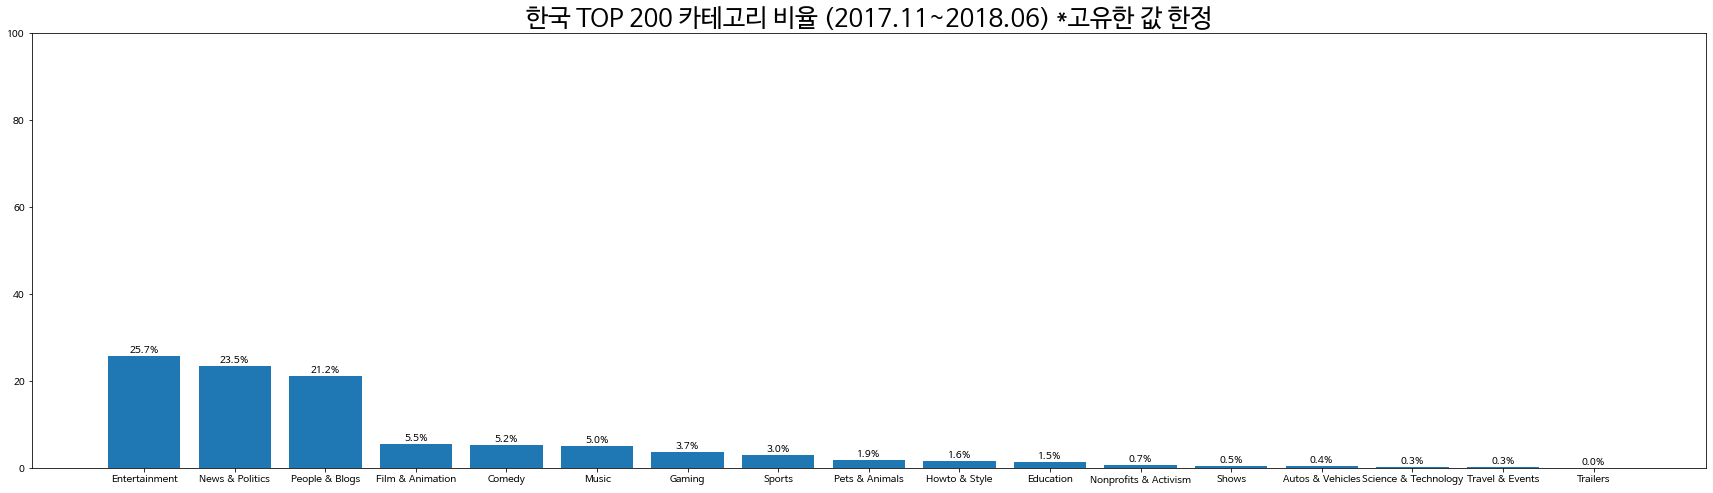

In [43]:
cat = df_2017_unique.groupby('category_name',as_index=False)['video_id'].count()
cat['ratio'] = cat['video_id'].div(len(df_2017_unique)/100)
cat_sort = cat.sort_values('ratio',ascending = False)

plt.figure(figsize=(30,8))
x = np.arange(len(cat_sort.category_name.unique()))
a = plt.bar(x, height = cat_sort['ratio']) #color= #edgecolot = 
plt.xticks(x, cat_sort['category_name'], fontsize = 10)
plt.title('한국 TOP 200 카테고리 비율 (2017.11~2018.06) *고유한 값 한정',fontsize = 25)
plt.ylim([0,100])
for rect in a:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f%%' % height, ha='center', va='bottom', size = 10)
plt.show()

얘는 unique와 아닌 것의 차이가 거의 없네요.

### 미국 데이터

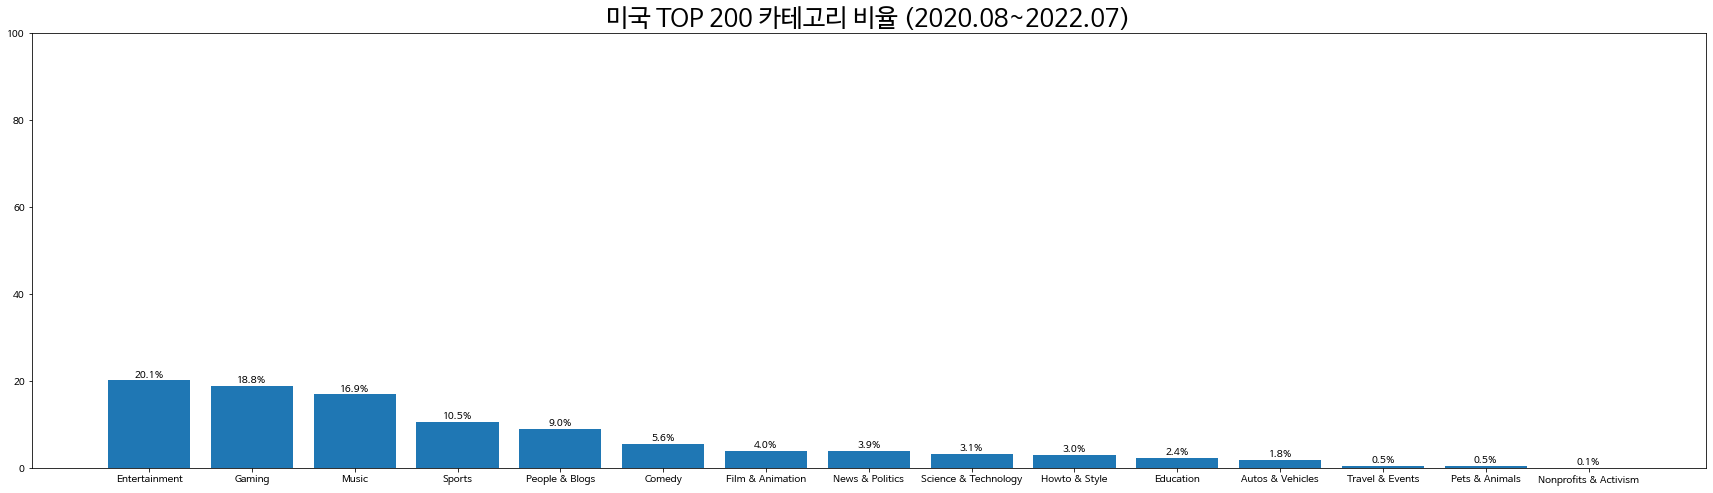

In [44]:
cat = df_us.groupby('category_name',as_index=False)['video_id'].count()
cat['ratio'] = cat['video_id'].div(len(df_us)/100)
cat_sort = cat.sort_values('ratio',ascending = False)

plt.figure(figsize=(30,8))
x = np.arange(len(cat_sort.category_name.unique()))
a = plt.bar(x, height = cat_sort['ratio']) #color= #edgecolot = 
plt.xticks(x, cat_sort['category_name'], fontsize = 10)
plt.title('미국 TOP 200 카테고리 비율 (2020.08~2022.07)',fontsize = 25)
plt.ylim([0,100])
for rect in a:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f%%' % height, ha='center', va='bottom', size = 10)
plt.show()

gaming과 music의 비율이 높은 편. music은 6%정도 차이나지만, gaming은 10% 넘게 차이가 남. 나머지는 비슷한 맥락.

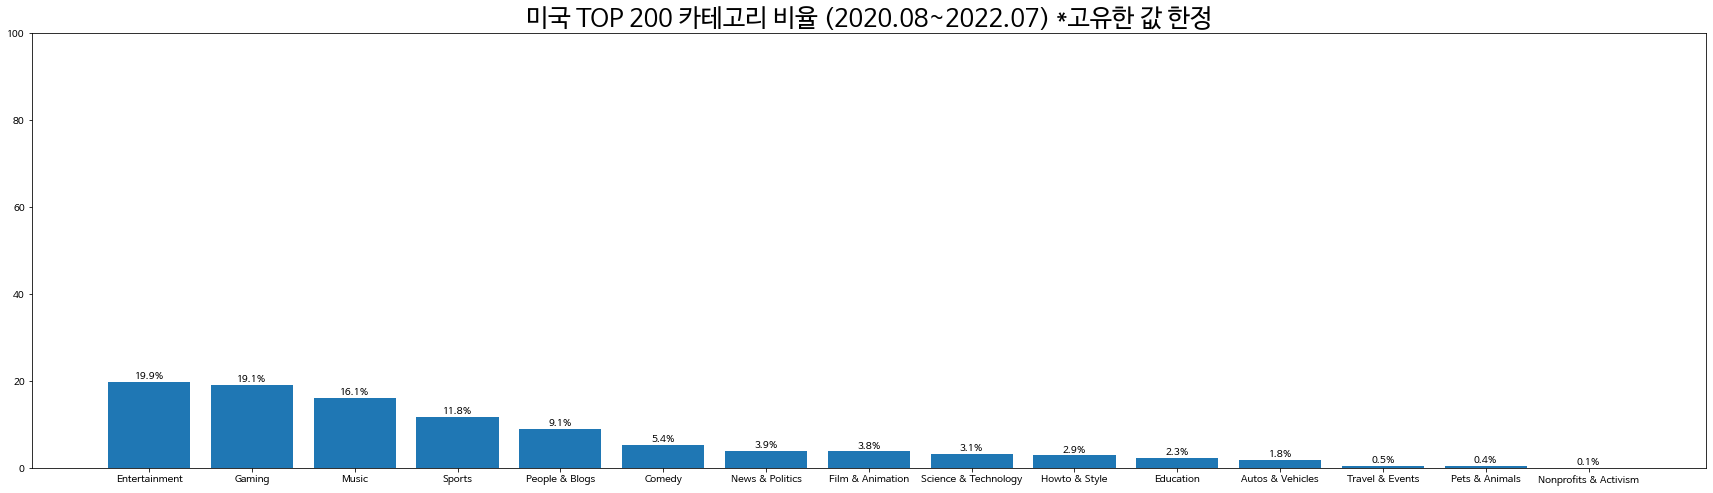

In [45]:
cat = df_us_unique.groupby('category_name',as_index=False)['video_id'].count()
cat['ratio'] = cat['video_id'].div(len(df_us_unique)/100)
cat_sort = cat.sort_values('ratio',ascending = False)

plt.figure(figsize=(30,8))
x = np.arange(len(cat_sort.category_name.unique()))
a = plt.bar(x, height = cat_sort['ratio']) #color= #edgecolot = 
plt.xticks(x, cat_sort['category_name'], fontsize = 10)
plt.title('미국 TOP 200 카테고리 비율 (2020.08~2022.07) *고유한 값 한정',fontsize = 25)
plt.ylim([0,100])
for rect in a:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f%%' % height, ha='center', va='bottom', size = 10)
plt.show()

역시나 여기도 News&politics는 짧은 period를 가진다는 것 빼고는 별 문제 없음.

## 2) 숫자형 변수의 분포 확인하기

In [70]:
df_unique[['view_count','likes','dislikes','comment_count','tag_num','period']].describe()

,view_count,likes,dislikes,comment_count,tag_num,period
count,1.692800e+04,1.692800e+04,16928.000000,1.692800e+04,16928.000000,16928.000000
mean,1.744099e+06,7.331135e+04,1010.230092,8.126222e+03,19.115371,7.888764
std,6.568573e+06,4.079228e+05,10874.417555,1.015823e+05,19.378800,2.824305
min,1.584500e+04,0.000000e+00,0.000000,0.000000e+00,0.000000,1.000000
25%,3.647022e+05,5.875750e+03,0.000000,5.730000e+02,6.000000,6.000000
50%,7.101320e+05,1.193050e+04,162.000000,1.267000e+03,13.000000,8.000000
75%,1.407619e+06,2.716225e+04,409.000000,2.978000e+03,27.000000,10.000000
max,2.925030e+08,1.641354e+07,879358.000000,6.913277e+06,144.000000,17.000000


In [71]:
df_2017_unique[['view_count','likes','dislikes','comment_count','tag_num','period']].describe()

,view_count,likes,dislikes,comment_count,tag_num,period
count,1.587500e+04,1.587500e+04,1.587500e+04,1.587500e+04,15875.000000,15875.000000
mean,3.729220e+05,9.460055e+03,4.248820e+02,1.512402e+03,16.022803,2.149543
std,2.075555e+06,8.671869e+04,1.205695e+04,1.502159e+04,19.360557,1.251205
min,2.050000e+03,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,1.000000
25%,4.134150e+04,3.700000e+02,1.800000e+01,8.400000e+01,2.000000,1.000000
50%,9.385000e+04,1.261000e+03,5.600000e+01,2.820000e+02,9.000000,2.000000
75%,2.413640e+05,3.340500e+03,1.450000e+02,7.585000e+02,22.000000,3.000000
max,1.138762e+08,5.150839e+06,1.470388e+06,1.142274e+06,152.000000,10.000000


In [72]:
df_us_unique[['view_count','likes','dislikes','comment_count','tag_num','period']].describe()

,view_count,likes,dislikes,comment_count,tag_num,period
count,2.629200e+04,2.629200e+04,26292.000000,2.629200e+04,26292.000000,26292.000000
mean,2.771971e+06,1.380720e+05,2127.455728,1.080101e+04,16.262133,5.306976
std,6.753847e+06,3.929235e+05,11052.880535,8.371486e+04,12.685985,1.779027
min,4.347200e+04,0.000000e+00,0.000000,0.000000e+00,0.000000,1.000000
25%,5.751090e+05,2.049875e+04,0.000000,1.411000e+03,5.000000,4.000000
50%,1.175020e+06,4.925900e+04,394.000000,3.169000e+03,16.000000,5.000000
75%,2.572902e+06,1.239450e+05,1384.000000,7.381500e+03,25.000000,6.000000
max,2.644074e+08,1.602153e+07,879354.000000,6.738537e+06,74.000000,36.000000


이렇게만 보면 잘 모르겠다. 비교를 시작하겠다

### 조회수 분포

In [80]:
print(np.percentile(df_unique['view_count'],100))
print(np.percentile(df_us_unique['view_count'],100))
print(np.percentile(df_unique['view_count'],90))
#print(np.percentile(df_2017_unique['view_count'],90))
print(np.percentile(df_us_unique['view_count'],90))

292502967.0
264407389.0
2726935.4000000013
5601042.9


<ipython-input-82-91f7c746fe7c>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  axes[1,0].hist(data = df_unique[df_unique['view_count']<np.percentile(df_unique['view_count'],90)][df_unique['view_count']>np.percentile(df_unique['view_count'],10)], x='view_count')
<ipython-input-82-91f7c746fe7c>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  axes[1,1].hist(data = df_2017_unique[df_2017_unique['view_count']<np.percentile(df_2017_unique['view_count'],90)][df_2017_unique['view_count']>np.percentile(df_2017_unique['view_count'],10)], x='view_count')
<ipython-input-82-91f7c746fe7c>:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  axes[1,2].hist(data = df_us_unique[df_us_unique['view_count']<np.percentile(df_us_unique['view_count'],90)][df_us_unique['view_count']>np.percentile(df_us_unique['view_count'],10)], x='view_count')


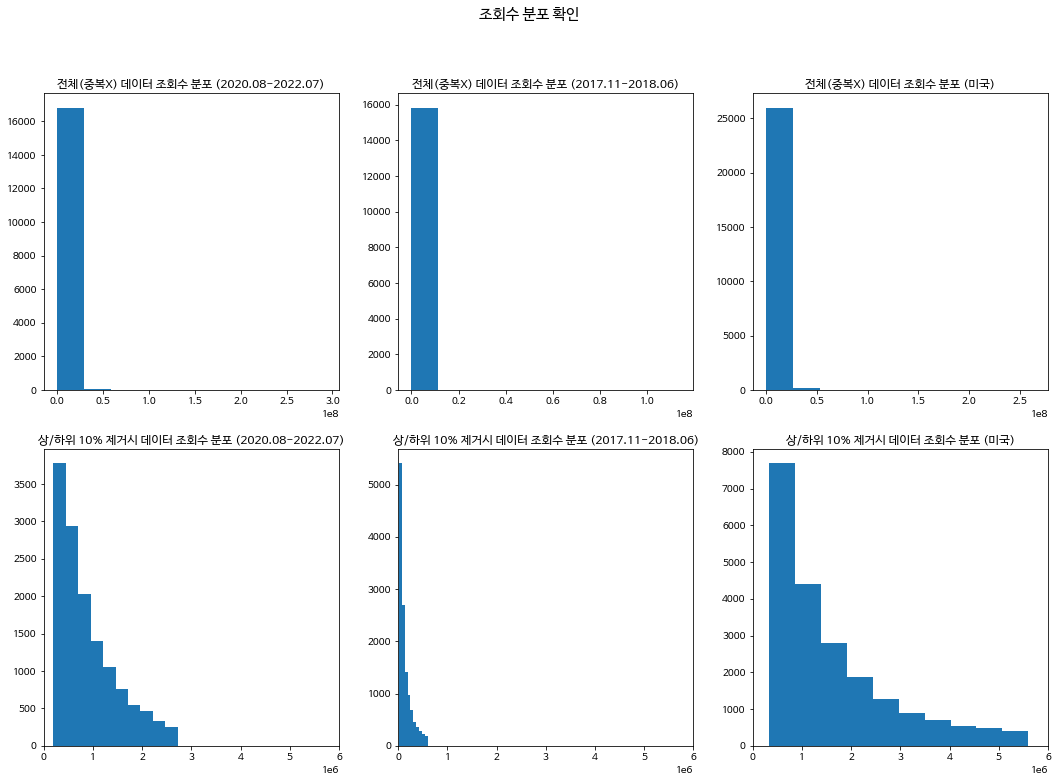

In [82]:
f, axes = plt.subplots(2, 3)
f.set_size_inches((18, 12))
f.suptitle('조회수 분포 확인', fontsize = 15)
axes[0,0].hist(data = df_unique, x='view_count')
axes[0,0].set_title('전체(중복X) 데이터 조회수 분포 (2020.08-2022.07)', fontsize = 12)

axes[1,0].hist(data = df_unique[df_unique['view_count']<np.percentile(df_unique['view_count'],90)][df_unique['view_count']>np.percentile(df_unique['view_count'],10)], x='view_count')
axes[1,0].set_title('상/하위 10% 제거시 데이터 조회수 분포 (2020.08-2022.07)', fontsize = 12)
axes[1,0].set_xlim([0,6000000])

axes[0,1].hist(data = df_2017_unique, x='view_count')
axes[0,1].set_title('전체(중복X) 데이터 조회수 분포 (2017.11-2018.06)', fontsize = 12)

axes[1,1].hist(data = df_2017_unique[df_2017_unique['view_count']<np.percentile(df_2017_unique['view_count'],90)][df_2017_unique['view_count']>np.percentile(df_2017_unique['view_count'],10)], x='view_count')
axes[1,1].set_title('상/하위 10% 제거시 데이터 조회수 분포 (2017.11-2018.06)', fontsize = 12)
axes[1,1].set_xlim([0,6000000])


axes[0,2].hist(data = df_us_unique, x='view_count')
axes[0,2].set_title('전체(중복X) 데이터 조회수 분포 (미국)', fontsize = 12)

axes[1,2].hist(data = df_us_unique[df_us_unique['view_count']<np.percentile(df_us_unique['view_count'],90)][df_us_unique['view_count']>np.percentile(df_us_unique['view_count'],10)], x='view_count')
axes[1,2].set_title('상/하위 10% 제거시 데이터 조회수 분포 (미국)', fontsize = 12)
axes[1,2].set_xlim([0,6000000])

plt.show()

### 좋아요 수 분포

In [83]:
print(np.percentile(df_unique['likes'],100))
print(np.percentile(df_us_unique['likes'],100))
print(np.percentile(df_unique['likes'],90))
#print(np.percentile(df_2017_unique['view_count'],90))
print(np.percentile(df_us_unique['likes'],90))

16413537.0
16021534.0
84614.10000000002
290891.20000000007


<ipython-input-84-ff0e203157b1>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  axes[1,0].hist(data = df_unique[df_unique['likes']<np.percentile(df_unique['likes'],90)][df_unique['likes']>np.percentile(df_unique['likes'],10)], x='likes')
<ipython-input-84-ff0e203157b1>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  axes[1,1].hist(data = df_2017_unique[df_2017_unique['likes']<np.percentile(df_2017_unique['likes'],90)][df_2017_unique['likes']>np.percentile(df_2017_unique['likes'],10)], x='likes')
<ipython-input-84-ff0e203157b1>:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  axes[1,2].hist(data = df_us_unique[df_us_unique['likes']<np.percentile(df_us_unique['likes'],90)][df_us_unique['likes']>np.percentile(df_us_unique['likes'],10)], x='likes')


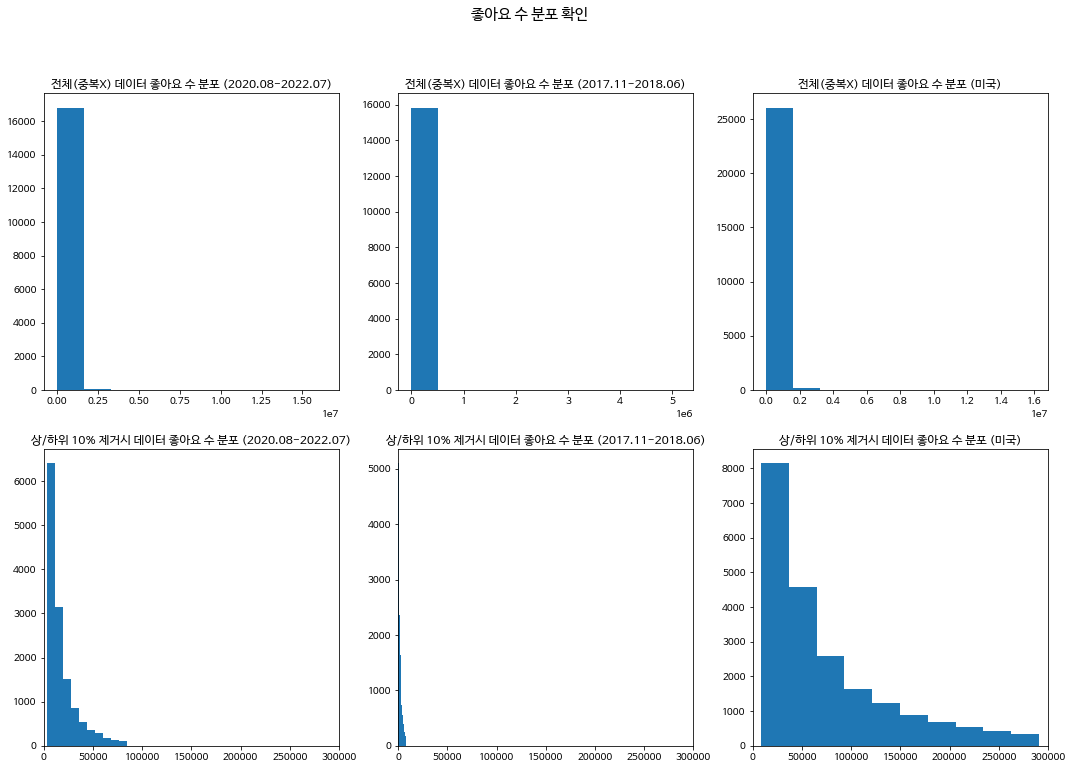

In [84]:
f, axes = plt.subplots(2, 3)
f.set_size_inches((18, 12))
f.suptitle('좋아요 수 분포 확인', fontsize = 15)
axes[0,0].hist(data = df_unique, x='likes')
axes[0,0].set_title('전체(중복X) 데이터 좋아요 수 분포 (2020.08-2022.07)', fontsize = 12)

axes[1,0].hist(data = df_unique[df_unique['likes']<np.percentile(df_unique['likes'],90)][df_unique['likes']>np.percentile(df_unique['likes'],10)], x='likes')
axes[1,0].set_title('상/하위 10% 제거시 데이터 좋아요 수 분포 (2020.08-2022.07)', fontsize = 12)
axes[1,0].set_xlim([0,300000])

axes[0,1].hist(data = df_2017_unique, x='likes')
axes[0,1].set_title('전체(중복X) 데이터 좋아요 수 분포 (2017.11-2018.06)', fontsize = 12)

axes[1,1].hist(data = df_2017_unique[df_2017_unique['likes']<np.percentile(df_2017_unique['likes'],90)][df_2017_unique['likes']>np.percentile(df_2017_unique['likes'],10)], x='likes')
axes[1,1].set_title('상/하위 10% 제거시 데이터 좋아요 수 분포 (2017.11-2018.06)', fontsize = 12)
axes[1,1].set_xlim([0,300000])


axes[0,2].hist(data = df_us_unique, x='likes')
axes[0,2].set_title('전체(중복X) 데이터 좋아요 수 분포 (미국)', fontsize = 12)

axes[1,2].hist(data = df_us_unique[df_us_unique['likes']<np.percentile(df_us_unique['likes'],90)][df_us_unique['likes']>np.percentile(df_us_unique['likes'],10)], x='likes')
axes[1,2].set_title('상/하위 10% 제거시 데이터 좋아요 수 분포 (미국)', fontsize = 12)
axes[1,2].set_xlim([0,300000])

plt.show()

### 싫어요 수 분포

In [89]:
print(np.percentile(df_unique['dislikes'],95))
#print(np.percentile(df_2017_unique['view_count'],90))
print(np.percentile(df_us_unique['dislikes'],95))

2254.5999999999985
7766.749999999956


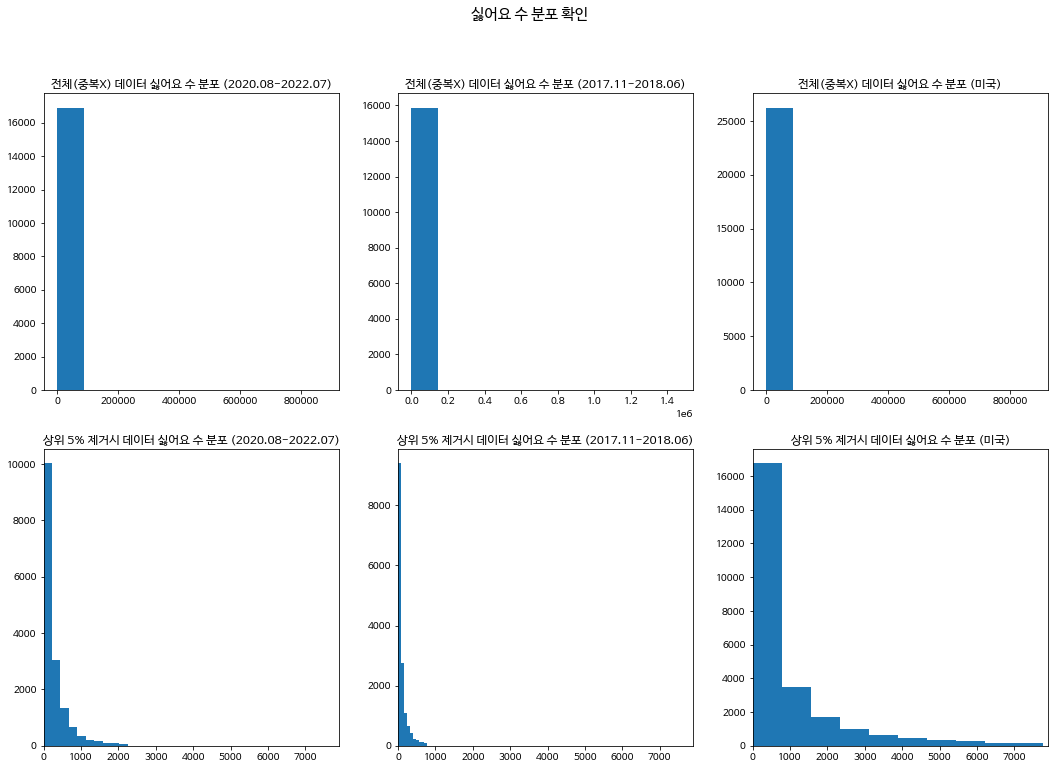

In [98]:
f, axes = plt.subplots(2, 3)
f.set_size_inches((18, 12))
f.suptitle('싫어요 수 분포 확인', fontsize = 15)
axes[0,0].hist(data = df_unique, x='dislikes')
axes[0,0].set_title('전체(중복X) 데이터 싫어요 수 분포 (2020.08-2022.07)', fontsize = 12)

axes[1,0].hist(data = df_unique[df_unique['dislikes']<np.percentile(df_unique['dislikes'],95)], x='dislikes')
axes[1,0].set_title('상위 5% 제거시 데이터 싫어요 수 분포 (2020.08-2022.07)', fontsize = 12)
axes[1,0].set_xlim([0,7900])

axes[0,1].hist(data = df_2017_unique, x='dislikes')
axes[0,1].set_title('전체(중복X) 데이터 싫어요 수 분포 (2017.11-2018.06)', fontsize = 12)

axes[1,1].hist(data = df_2017_unique[df_2017_unique['dislikes']<np.percentile(df_2017_unique['dislikes'],95)], x='dislikes')
axes[1,1].set_title('상위 5% 제거시 데이터 싫어요 수 분포 (2017.11-2018.06)', fontsize = 12)
axes[1,1].set_xlim([0,7900])


axes[0,2].hist(data = df_us_unique, x='dislikes')
axes[0,2].set_title('전체(중복X) 데이터 싫어요 수 분포 (미국)', fontsize = 12)

axes[1,2].hist(data = df_us_unique[df_us_unique['dislikes']<np.percentile(df_us_unique['dislikes'],95)], x='dislikes')
axes[1,2].set_title('상위 5% 제거시 데이터 싫어요 수 분포 (미국)', fontsize = 12)
axes[1,2].set_xlim([0,7900])

plt.show()

### 댓글 수 분포

In [97]:
print(np.percentile(df_unique['comment_count'],100))
print(np.percentile(df_us_unique['comment_count'],100))
print(np.percentile(df_unique['comment_count'],95))
#print(np.percentile(df_2017_unique['view_count'],90))
print(np.percentile(df_us_unique['comment_count'],95))

6913277.0
6738537.0
15027.949999999992
30673.449999999997


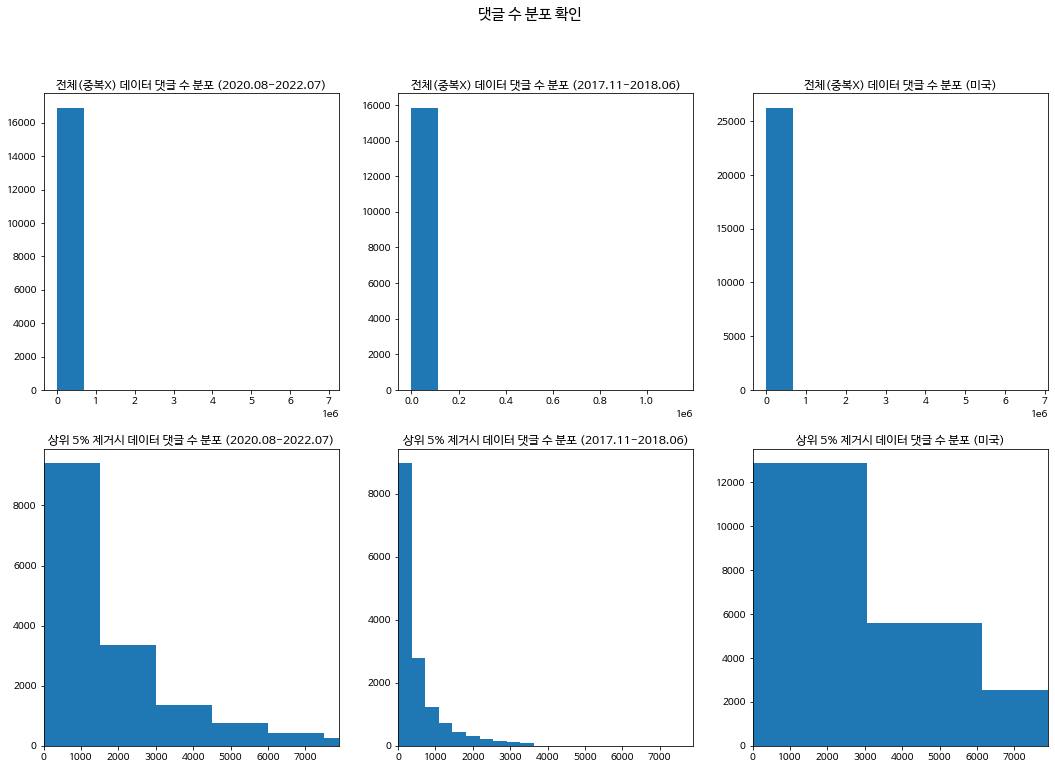

In [99]:
f, axes = plt.subplots(2, 3)
f.set_size_inches((18, 12))
f.suptitle('댓글 수 분포 확인', fontsize = 15)
axes[0,0].hist(data = df_unique, x='comment_count')
axes[0,0].set_title('전체(중복X) 데이터 댓글 수 분포 (2020.08-2022.07)', fontsize = 12)

axes[1,0].hist(data = df_unique[df_unique['comment_count']<np.percentile(df_unique['comment_count'],95)], x='comment_count')
axes[1,0].set_title('상위 5% 제거시 데이터 댓글 수 분포 (2020.08-2022.07)', fontsize = 12)
axes[1,0].set_xlim([0,7900])

axes[0,1].hist(data = df_2017_unique, x='comment_count')
axes[0,1].set_title('전체(중복X) 데이터 댓글 수 분포 (2017.11-2018.06)', fontsize = 12)

axes[1,1].hist(data = df_2017_unique[df_2017_unique['comment_count']<np.percentile(df_2017_unique['comment_count'],95)], x='comment_count')
axes[1,1].set_title('상위 5% 제거시 데이터 댓글 수 분포 (2017.11-2018.06)', fontsize = 12)
axes[1,1].set_xlim([0,7900])


axes[0,2].hist(data = df_us_unique, x='comment_count')
axes[0,2].set_title('전체(중복X) 데이터 댓글 수 분포 (미국)', fontsize = 12)

axes[1,2].hist(data = df_us_unique[df_us_unique['comment_count']<np.percentile(df_us_unique['comment_count'],95)], x='comment_count')
axes[1,2].set_title('상위 5% 제거시 데이터 댓글 수 분포 (미국)', fontsize = 12)
axes[1,2].set_xlim([0,7900])

plt.show()

### 인기동영상에 머문 기간 분포

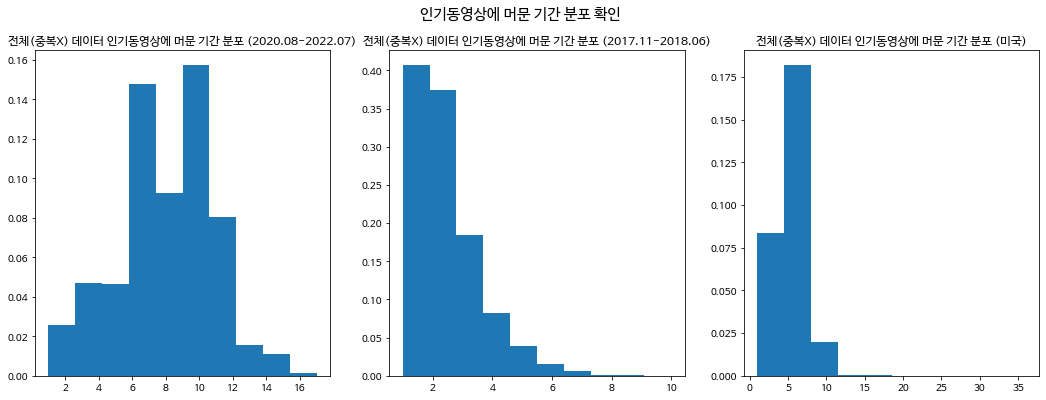

In [108]:
f, axes = plt.subplots(1, 3)
f.set_size_inches((18, 6))
f.suptitle('인기동영상에 머문 기간 분포 확인', fontsize = 15)
axes[0].hist(data = df_unique, x='period', density=True)
axes[0].set_title('전체(중복X) 데이터 인기동영상에 머문 기간 분포 (2020.08-2022.07)', fontsize = 12)


axes[1].hist(data = df_2017_unique, x='period', density=True)
axes[1].set_title('전체(중복X) 데이터 인기동영상에 머문 기간 분포 (2017.11-2018.06)', fontsize = 12)


axes[2].hist(data = df_us_unique, x='period', density=True)
axes[2].set_title('전체(중복X) 데이터 인기동영상에 머문 기간 분포 (미국)', fontsize = 12)



plt.show()

### 태그 수 분포

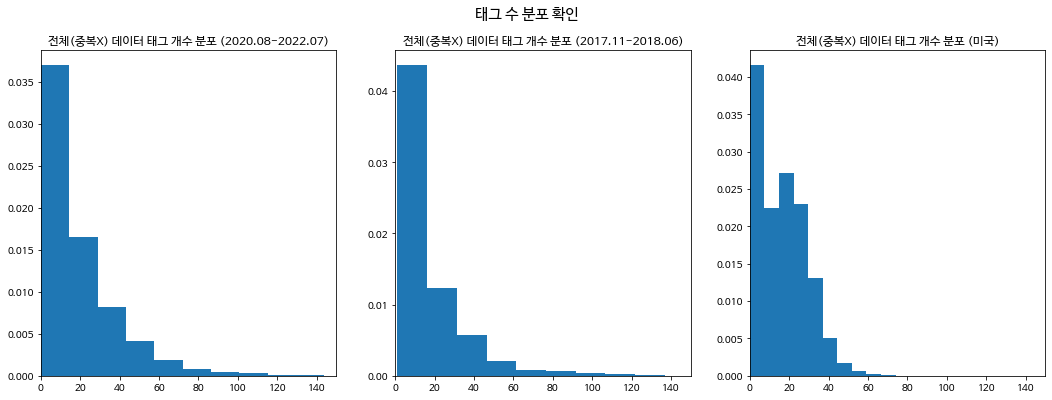

In [107]:
f, axes = plt.subplots(1, 3)
f.set_size_inches((18, 6))
f.suptitle('태그 수 분포 확인', fontsize = 15)
axes[0].hist(data = df_unique, x='tag_num', density=True)
axes[0].set_title('전체(중복X) 데이터 태그 개수 분포 (2020.08-2022.07)', fontsize = 12)
axes[0].set_xlim([0,150])


axes[1].hist(data = df_2017_unique, x='tag_num', density=True)
axes[1].set_title('전체(중복X) 데이터 태그 개수 분포 (2017.11-2018.06)', fontsize = 12)
axes[1].set_xlim([0,150])


axes[2].hist(data = df_us_unique, x='tag_num', density=True)
axes[2].set_title('전체(중복X) 데이터 태그 개수 분포 (미국)', fontsize = 12)
axes[2].set_xlim([0,150])




plt.show()

총평 : 전체적으로 2020-2022가 훨씬 뭔가 더 많은 느낌이어서, 기간별 비교는 하면 좋을 듯하다.
또한 period같은 경우 명확하게 해석하기는 어렵지만 확실히 최신일수록 인기동영상에 머무는 기간이 길어지고 있는 것이 보인다. 도대체 왜일까... 

# 2. 이변량 분석

## 1) 조회수, 좋아요 수, 싫어요 수, 댓글 수의 관계 확인하기

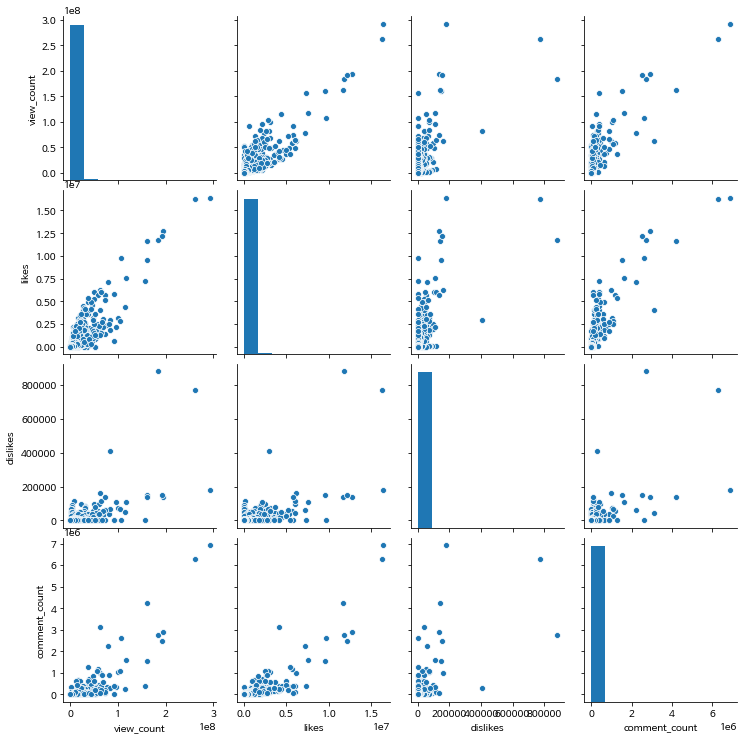

In [46]:
sns.pairplot(df_unique[['view_count','likes','dislikes','comment_count']], diag_kind='hist')
plt.show()

In [49]:
df_unique[['view_count','likes','dislikes','comment_count']].corr()

,view_count,likes,dislikes,comment_count
view_count,1.000000,0.877494,0.644445,0.786963
likes,0.877494,1.000000,0.642942,0.810174
dislikes,0.644445,0.642942,1.000000,0.642950
comment_count,0.786963,0.810174,0.642950,1.000000


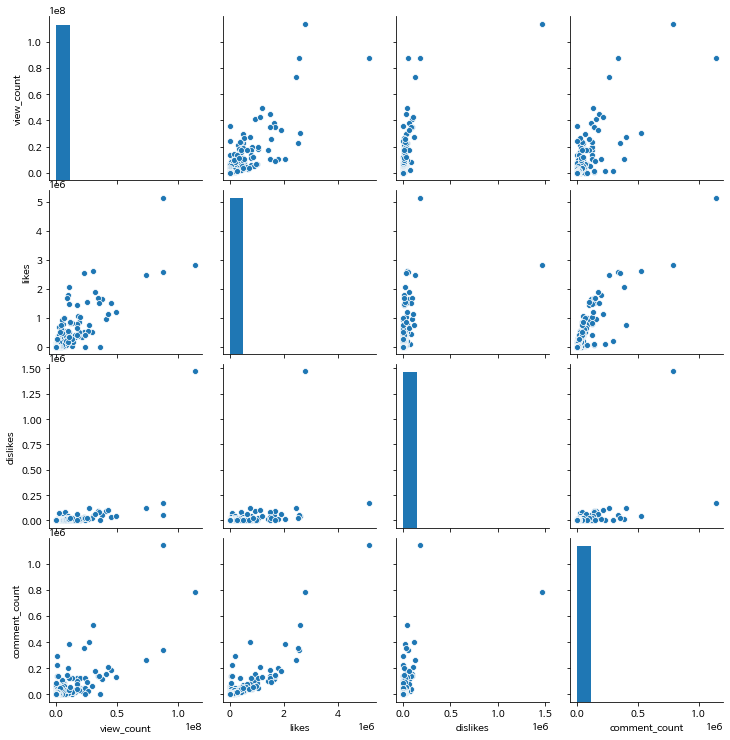

In [109]:
sns.pairplot(df_2017_unique[['view_count','likes','dislikes','comment_count']], diag_kind='hist')
plt.show()

In [110]:
df_2017_unique[['view_count','likes','dislikes','comment_count']].corr()
# 뭔가 상관관계가 뚜렷해진 느낌은 기분탓?

,view_count,likes,dislikes,comment_count
view_count,1.000000,0.828187,0.604446,0.772511
likes,0.828187,1.000000,0.432427,0.876837
dislikes,0.604446,0.432427,1.000000,0.571998
comment_count,0.772511,0.876837,0.571998,1.000000


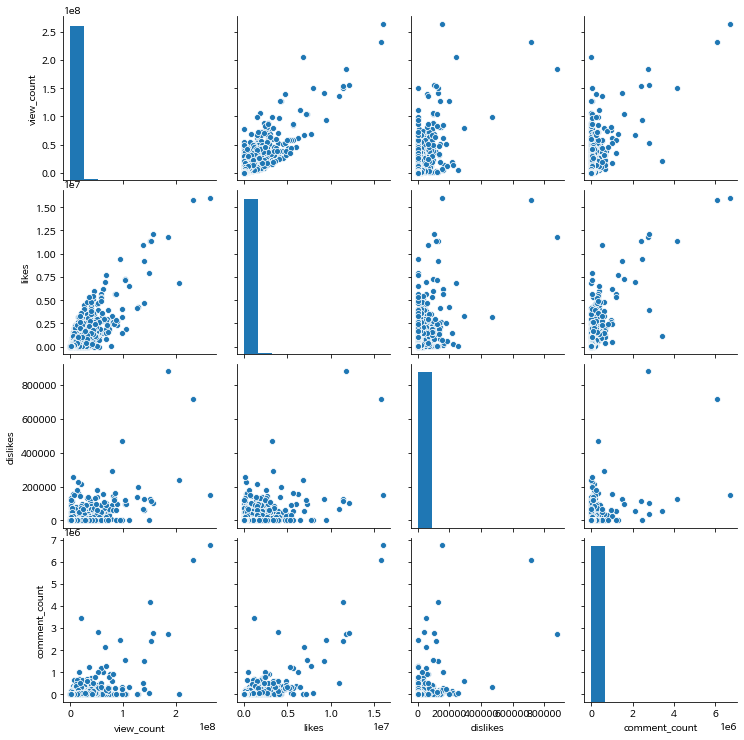

In [111]:
sns.pairplot(df_us_unique[['view_count','likes','dislikes','comment_count']], diag_kind='hist')
plt.show()

In [112]:
df_unique[['view_count','likes','dislikes','comment_count']].corr()

,view_count,likes,dislikes,comment_count
view_count,1.000000,0.877494,0.644445,0.786963
likes,0.877494,1.000000,0.642942,0.810174
dislikes,0.644445,0.642942,1.000000,0.642950
comment_count,0.786963,0.810174,0.642950,1.000000


## 2) 카테고리별로 조회수, 좋아요, 싫어요, 댓글

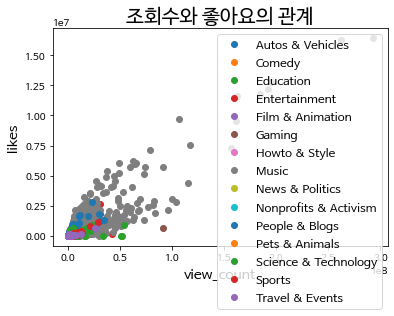

In [14]:
groups = df_unique.groupby('category_name')

fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group['view_count'], group['likes'],marker='o',linestyle='',label=name)
ax.legend(fontsize=12, loc='upper right') # legend position
plt.title('조회수와 좋아요의 관계', fontsize=20)
plt.xlabel('view_count', fontsize=14)
plt.ylabel('likes', fontsize=14)
plt.show()
#출처: https://rfriend.tistory.com/414 [R, Python 분석과 프로그래밍의 친구 (by R Friend):티스토리]
# ㅎ...ㅎ....ㅎ....;;;;;;;;;;;;;;;;;;;;;;;; 으아아아아아아아ㅔ아아ㅔ아ㅏㅏ어ㅏㅇ 이렇게가면 안된다는 거야.........
# 그렇다고 평균을 쓰냐?
# 평균 ? median? 평균? 아ㅏ아앙아앙ㅇ낭나아ㅔ러ㅏㅣㅇ리나어ㅔㄴㅇ
# 어쨌든 이런 비주얼은... 진짜 좋지 않다...

In [16]:
print(df_unique[df_unique['category_name']!='trailer'][df_unique['category_name']!='shows'].median())
print(df_2017_unique[df_2017_unique['category_name']!='trailer'][df_2017_unique['category_name']!='shows'].median())
print(df_us_unique[df_us_unique['category_name']!='trailer'][df_us_unique['category_name']!='shows'].median())

view_count           710132.0
likes                 11930.5
dislikes                162.0
comment_count          1267.0
tag_num                  13.0
period                    8.0
Unnamed: 0            59933.0
comments_disabled         0.0
ratings_disabled          0.0
dtype: float64
view_count                93850.0
likes                      1261.0
dislikes                     56.0
comment_count               282.0
video_error_or_removed        0.0
tag_num                       9.0
period                        2.0
dtype: float64
view_count       1175020.5
likes              49259.0
dislikes             394.0
comment_count       3169.0
tag_num               16.0
period                 5.0
dtype: float64


In [33]:
df_med = df_unique.groupby('category_name',as_index=False).median()
df_2017_med = df_2017_unique[df_2017_unique['category_name']!='Trailers'][df_2017_unique['category_name']!='Shows'].groupby('category_name',as_index=False).median()
df_2017_med.drop('video_error_or_removed',axis=1,inplace=True)
df_us_med = df_us_unique[df_us_unique['category_name']!='Trailers'][df_us_unique['category_name']!='Shows'].groupby('category_name',as_index=False).median()

<ipython-input-33-911dae08791a>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_2017_med = df_2017_unique[df_2017_unique['category_name']!='Trailers'][df_2017_unique['category_name']!='Shows'].groupby('category_name',as_index=False).median()


In [34]:
#
total = pd.DataFrame({'view_count':[710132],
              'likes':[11930], 
              'dislikes':[162],
              'comment_count':[1267], 'tag_num':[13],'period':[8],'category_name': ['Total']})
df_med = pd.concat([df_med, total])
df_med.drop(['Unnamed: 0', 'comments_disabled', 'ratings_disabled'], axis=1, inplace=True)
df_med.reset_index(drop=True, inplace=True)

In [35]:
df_med

,category_name,view_count,likes,dislikes,comment_count,tag_num,period
0,Autos & Vehicles,501041.0,4614.5,148.5,937.5,13.0,8.0
1,Comedy,776137.0,13493.0,212.5,1366.0,10.0,9.0
2,Education,458622.0,9803.0,183.0,867.0,13.0,8.0
3,Entertainment,770633.0,12360.0,156.0,1200.0,18.0,8.0
4,Film & Animation,824596.0,15491.0,203.0,1717.0,8.0,8.0
5,Gaming,517088.0,7541.0,94.0,1296.0,14.0,8.0
6,Howto & Style,627677.0,10912.0,149.0,419.0,11.0,9.0
7,Music,1230380.0,61883.0,204.0,3948.0,14.0,8.0
8,News & Politics,577256.0,8749.0,221.0,1605.0,13.0,6.0
9,Nonprofits & Activism,398342.5,8359.5,106.0,635.5,11.0,8.0


In [36]:
total_2017 = pd.DataFrame({'view_count':[93850],
              'likes':[1261], 
              'dislikes':[56],
              'comment_count':[282], 'tag_num':[9],'period':[2],'category_name': ['Total']})
df_2017_med = pd.concat([df_2017_med, total_2017])
#df_2017_med.drop(['comments_disabled', 'ratings_disabled'], axis=1, inplace=True)
df_2017_med.reset_index(drop=True, inplace=True)

In [37]:
df_2017_med

,category_name,view_count,likes,dislikes,comment_count,tag_num,period
0,Autos & Vehicles,29373.0,1043.0,17.0,138.5,7.0,2.0
1,Comedy,235125.0,3297.0,94.0,806.0,19.0,2.0
2,Education,39681.0,957.0,26.0,133.0,10.0,2.0
3,Entertainment,121858.5,1500.0,62.0,326.0,12.0,2.0
4,Film & Animation,144516.5,989.0,44.0,373.5,12.0,2.0
5,Gaming,92159.0,1349.5,44.0,482.5,15.0,2.0
6,Howto & Style,104180.0,2415.0,45.0,284.0,15.0,2.0
7,Music,200105.0,7125.5,75.5,714.0,11.0,2.0
8,News & Politics,70390.0,1142.5,74.0,263.0,8.0,2.0
9,Nonprofits & Activism,43595.0,468.0,34.0,53.0,16.0,2.0


In [40]:
total_us = pd.DataFrame({'view_count':[1175020.5],
              'likes':[49259], 
              'dislikes':[394],
              'comment_count':[3169], 'tag_num':[16],'period':[5],'category_name': ['Total']})
df_us_med = pd.concat([df_us_med, total_us])
#df_us_med.drop(['Unnamed: 0', 'comments_disabled', 'ratings_disabled'], axis=1, inplace=True)
df_us_med.reset_index(drop=True, inplace=True)

In [42]:
df_us_med

,category_name,view_count,likes,dislikes,comment_count,tag_num,period
0,Autos & Vehicles,787064.0,33249.0,341.5,2726.5,16.5,5.0
1,Comedy,1146182.0,75782.0,408.0,3589.0,13.0,5.0
2,Education,1273469.0,67381.0,396.0,3845.0,11.0,5.0
3,Entertainment,1297953.0,57349.0,399.0,3127.0,15.0,5.0
4,Film & Animation,1251353.5,62785.5,369.0,3541.5,14.0,5.0
5,Gaming,1094762.0,50026.0,338.0,2972.0,17.0,5.0
6,Howto & Style,854271.0,47095.0,402.0,2974.0,15.0,5.0
7,Music,1825587.0,98988.0,742.0,5545.0,17.0,5.0
8,News & Politics,733416.0,7401.0,260.0,2870.0,9.0,5.0
9,Nonprofits & Activism,1155096.0,67438.0,926.5,3985.5,6.0,5.0


In [46]:
df_med

,category_name,view_count,likes,dislikes,comment_count,tag_num,period,view_div_likes
0,Autos & Vehicles,501041.0,4614.5,148.5,937.5,13.0,8.0,108.579694
1,Comedy,776137.0,13493.0,212.5,1366.0,10.0,9.0,57.521456
2,Education,458622.0,9803.0,183.0,867.0,13.0,8.0,46.783842
3,Entertainment,770633.0,12360.0,156.0,1200.0,18.0,8.0,62.348948
4,Film & Animation,824596.0,15491.0,203.0,1717.0,8.0,8.0,53.230650
5,Gaming,517088.0,7541.0,94.0,1296.0,14.0,8.0,68.570216
6,Howto & Style,627677.0,10912.0,149.0,419.0,11.0,9.0,57.521719
7,Music,1230380.0,61883.0,204.0,3948.0,14.0,8.0,19.882359
8,News & Politics,577256.0,8749.0,221.0,1605.0,13.0,6.0,65.979655
9,Nonprofits & Activism,398342.5,8359.5,106.0,635.5,11.0,8.0,47.651474


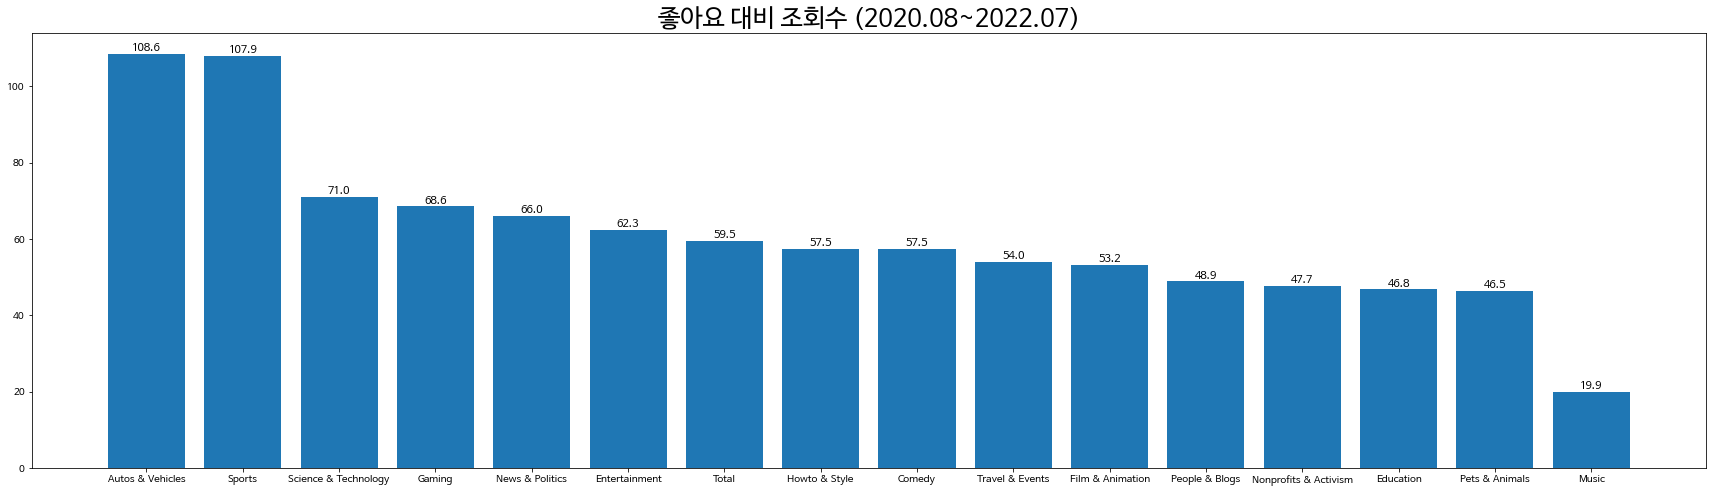

In [45]:
df_med['view_div_likes'] = df_med['view_count']/df_med['likes']
viewlikes_sort = df_med.sort_values('view_div_likes',ascending = False)[['category_name','view_div_likes']]

plt.figure(figsize=(30,8))
x = np.arange(len(viewlikes_sort.category_name.unique()))
a = plt.bar(x, height = viewlikes_sort['view_div_likes']) #color= #edgecolot = 
plt.xticks(x, viewlikes_sort['category_name'], fontsize = 10)
plt.title('좋아요 대비 조회수 (2020.08~2022.07)',fontsize = 25)
for rect in a:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 11)
plt.show()

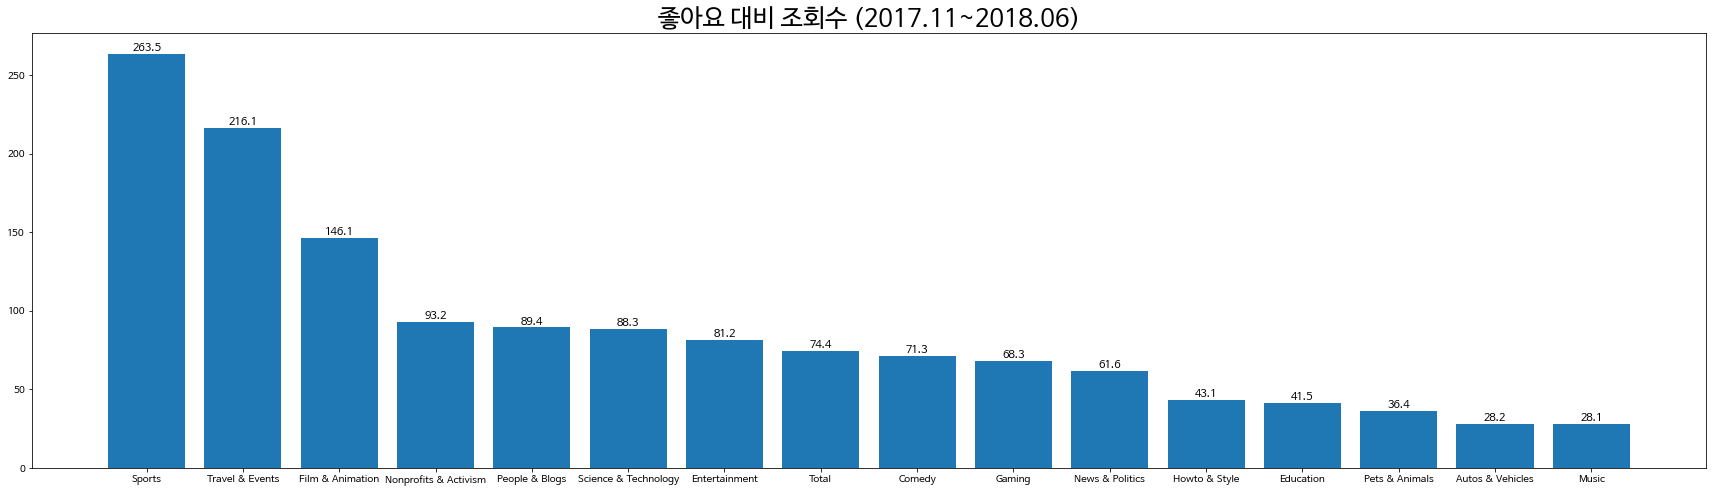

In [47]:
df_2017_med['view_div_likes'] = df_2017_med['view_count']/df_2017_med['likes']
viewlikes_sort = df_2017_med.sort_values('view_div_likes',ascending = False)[['category_name','view_div_likes']]

plt.figure(figsize=(30,8))
x = np.arange(len(viewlikes_sort.category_name.unique()))
a = plt.bar(x, height = viewlikes_sort['view_div_likes']) #color= #edgecolot = 
plt.xticks(x, viewlikes_sort['category_name'], fontsize = 10)
plt.title('좋아요 대비 조회수 (2017.11~2018.06)',fontsize = 25)
for rect in a:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 11)
plt.show()

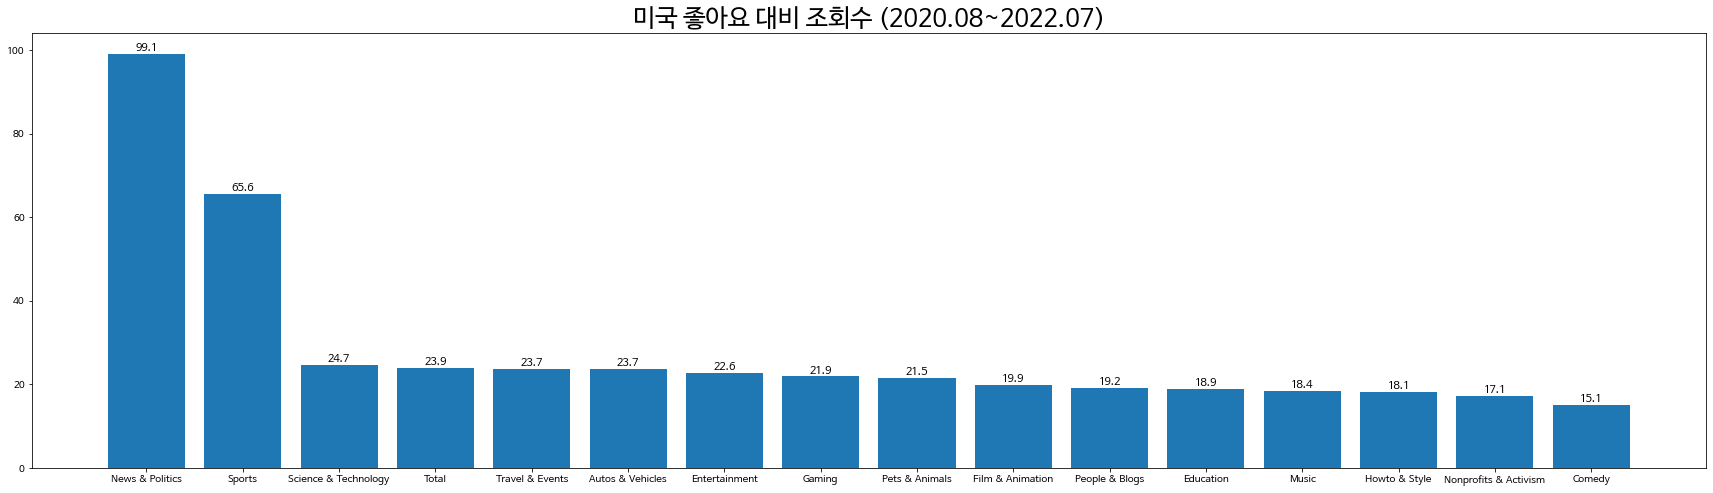

In [48]:
df_us_med['view_div_likes'] = df_us_med['view_count']/df_us_med['likes']
viewlikes_sort = df_us_med.sort_values('view_div_likes',ascending = False)[['category_name','view_div_likes']]

plt.figure(figsize=(30,8))
x = np.arange(len(viewlikes_sort.category_name.unique()))
a = plt.bar(x, height = viewlikes_sort['view_div_likes']) #color= #edgecolot = 
plt.xticks(x, viewlikes_sort['category_name'], fontsize = 10)
plt.title('미국 좋아요 대비 조회수 (2020.08~2022.07)',fontsize = 25)
for rect in a:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 11)
plt.show()

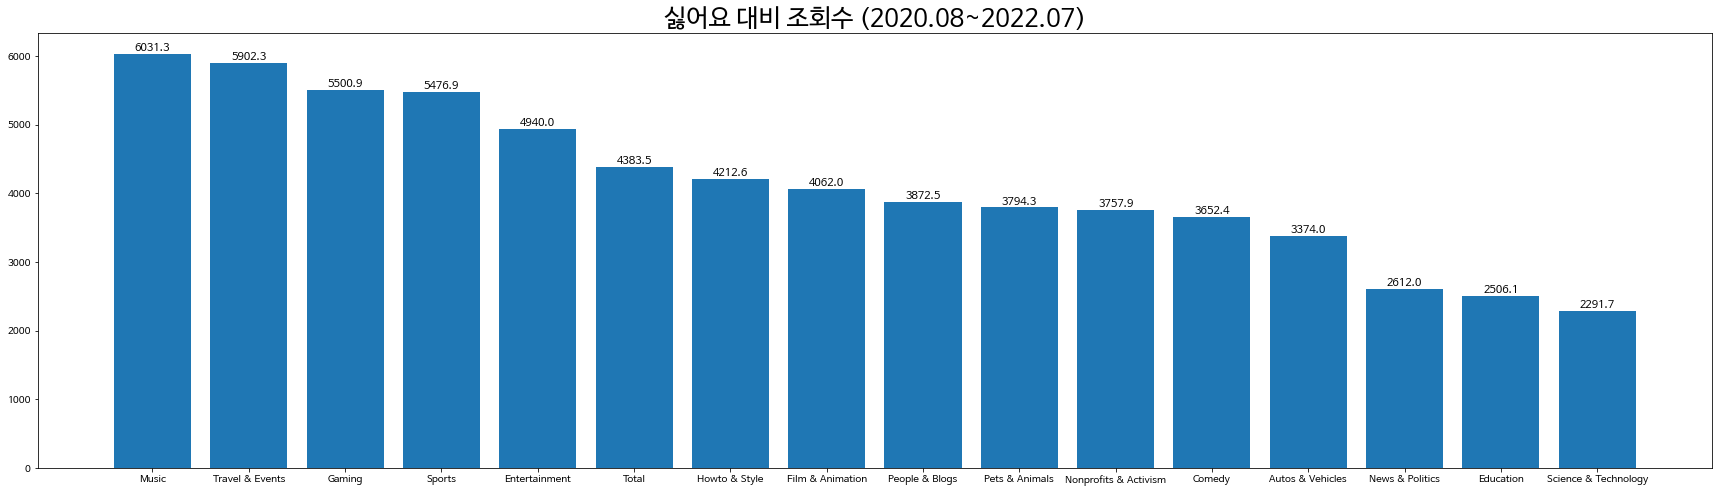

In [50]:
df_med['view_div_dislikes'] = df_med['view_count']/df_med['dislikes']
viewdislikes_sort = df_med.sort_values('view_div_dislikes',ascending = False)[['category_name','view_div_dislikes']]

plt.figure(figsize=(30,8))
x = np.arange(len(viewdislikes_sort.category_name.unique()))
a = plt.bar(x, height = viewdislikes_sort['view_div_dislikes']) #color= #edgecolot = 
plt.xticks(x, viewdislikes_sort['category_name'], fontsize = 10)
plt.title('싫어요 대비 조회수 (2020.08~2022.07)',fontsize = 25)
for rect in a:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 11)
plt.show()

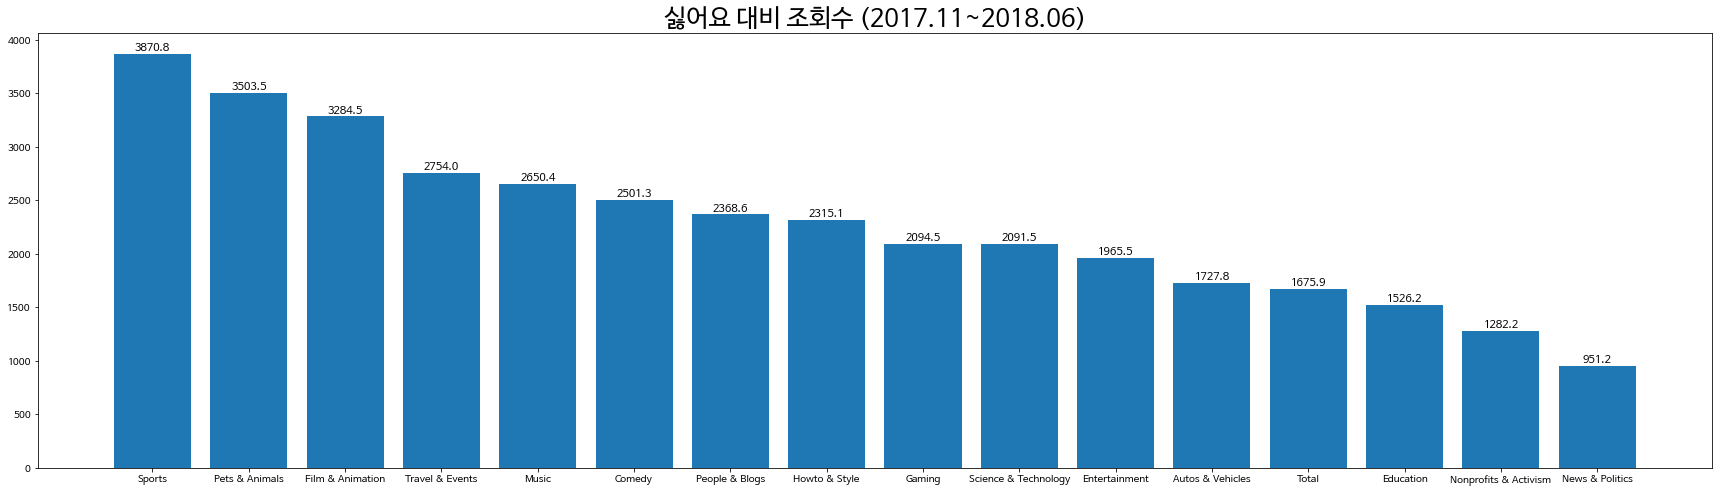

In [52]:
df_2017_med['view_div_dislikes'] = df_2017_med['view_count']/df_2017_med['dislikes']
viewdislikes_sort = df_2017_med.sort_values('view_div_dislikes',ascending = False)[['category_name','view_div_dislikes']]

plt.figure(figsize=(30,8))
x = np.arange(len(viewdislikes_sort.category_name.unique()))
a = plt.bar(x, height = viewdislikes_sort['view_div_dislikes']) #color= #edgecolot = 
plt.xticks(x, viewdislikes_sort['category_name'], fontsize = 10)
plt.title('싫어요 대비 조회수 (2017.11~2018.06)',fontsize = 25)
for rect in a:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 11)
plt.show()

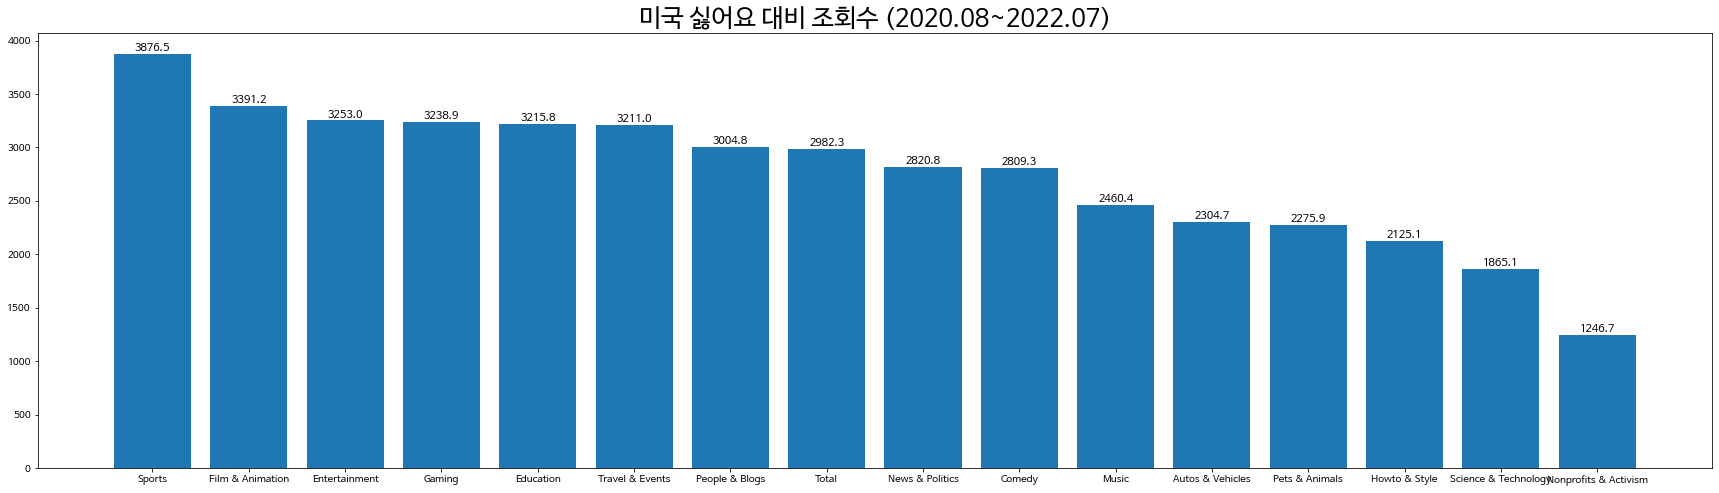

In [54]:
df_us_med['view_div_dislikes'] = df_us_med['view_count']/df_us_med['dislikes']
viewdislikes_sort = df_us_med.sort_values('view_div_dislikes',ascending = False)[['category_name','view_div_dislikes']]

plt.figure(figsize=(30,8))
x = np.arange(len(viewdislikes_sort.category_name.unique()))
a = plt.bar(x, height = viewdislikes_sort['view_div_dislikes']) #color= #edgecolot = 
plt.xticks(x, viewdislikes_sort['category_name'], fontsize = 10)
plt.title('미국 싫어요 대비 조회수 (2020.08~2022.07)',fontsize = 25)
for rect in a:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 11)
plt.show()

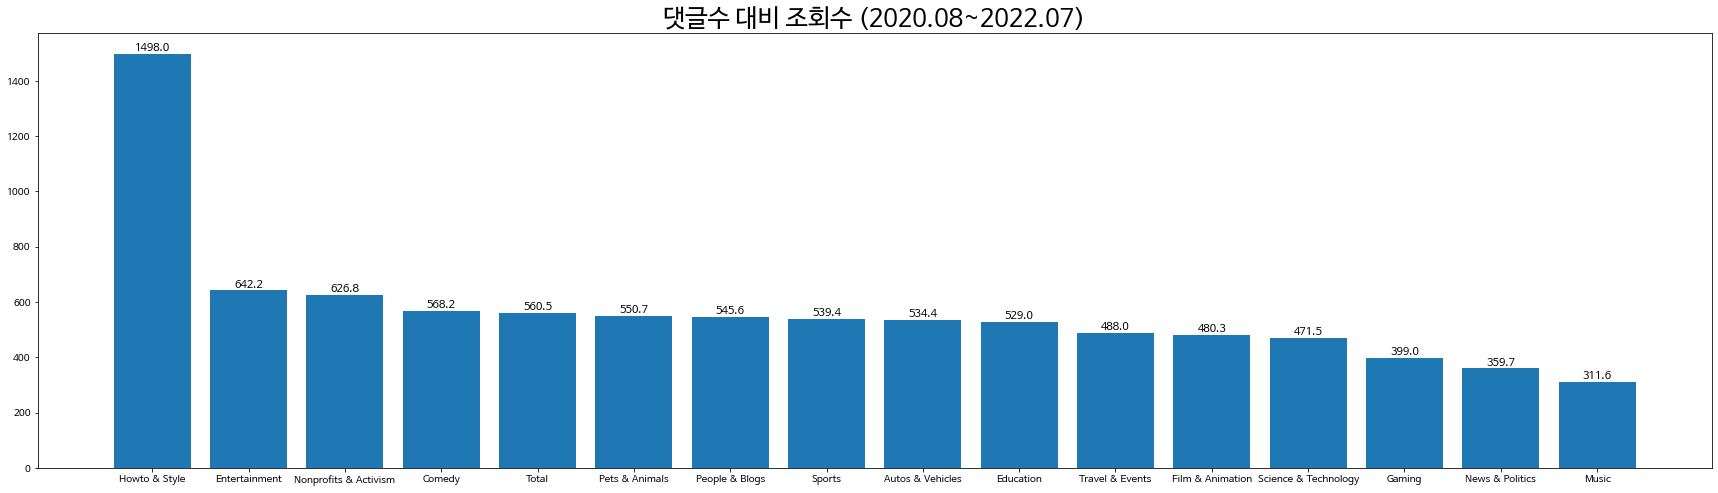

In [56]:
df_med['view_div_comment'] = df_med['view_count']/df_med['comment_count']
viewcomment_sort = df_med.sort_values('view_div_comment',ascending = False)[['category_name','view_div_comment']]

plt.figure(figsize=(30,8))
x = np.arange(len(viewcomment_sort.category_name.unique()))
a = plt.bar(x, height = viewcomment_sort['view_div_comment']) #color= #edgecolot = 
plt.xticks(x, viewcomment_sort['category_name'], fontsize = 10)
plt.title('댓글수 대비 조회수 (2020.08~2022.07)',fontsize = 25)
for rect in a:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 11)
plt.show()

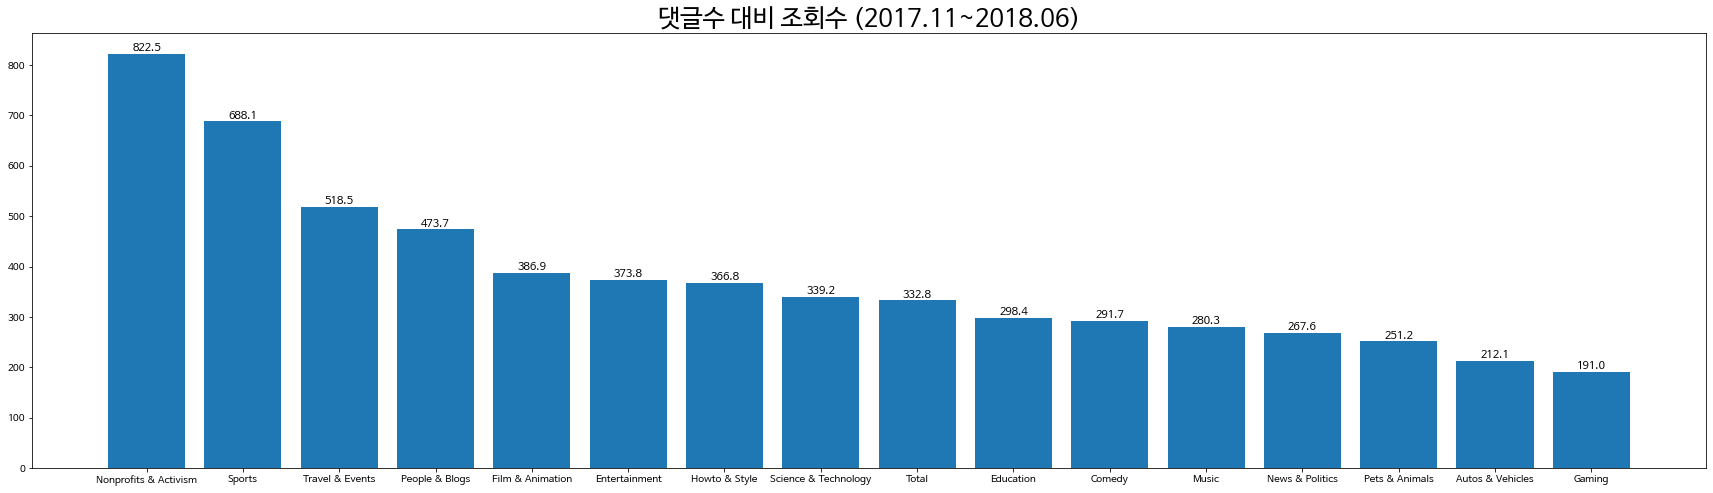

In [57]:
df_2017_med['view_div_comment'] = df_2017_med['view_count']/df_2017_med['comment_count']
viewcomment_sort = df_2017_med.sort_values('view_div_comment',ascending = False)[['category_name','view_div_comment']]

plt.figure(figsize=(30,8))
x = np.arange(len(viewcomment_sort.category_name.unique()))
a = plt.bar(x, height = viewcomment_sort['view_div_comment']) #color= #edgecolot = 
plt.xticks(x, viewcomment_sort['category_name'], fontsize = 10)
plt.title('댓글수 대비 조회수 (2017.11~2018.06)',fontsize = 25)
for rect in a:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 11)
plt.show()

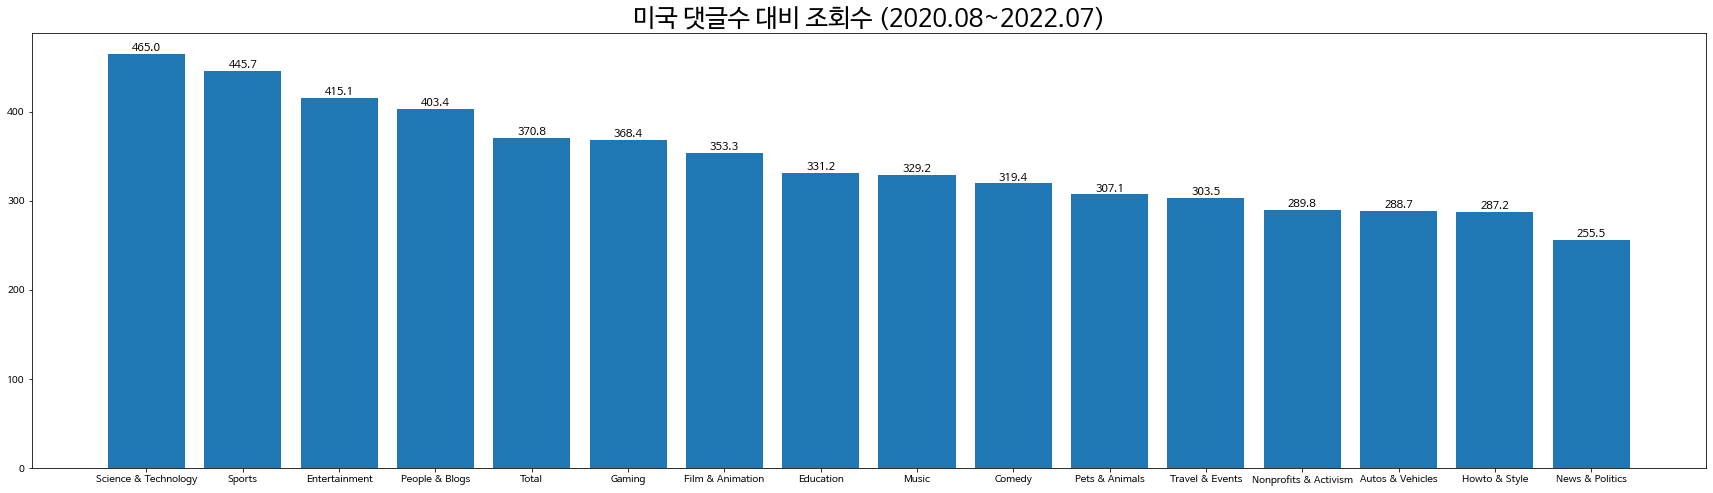

In [58]:
df_us_med['view_div_comment'] = df_us_med['view_count']/df_us_med['comment_count']
viewcomment_sort = df_us_med.sort_values('view_div_comment',ascending = False)[['category_name','view_div_comment']]

plt.figure(figsize=(30,8))
x = np.arange(len(viewcomment_sort.category_name.unique()))
a = plt.bar(x, height = viewcomment_sort['view_div_comment']) #color= #edgecolot = 
plt.xticks(x, viewcomment_sort['category_name'], fontsize = 10)
plt.title('미국 댓글수 대비 조회수 (2020.08~2022.07)',fontsize = 25)
for rect in a:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 11)
plt.show()

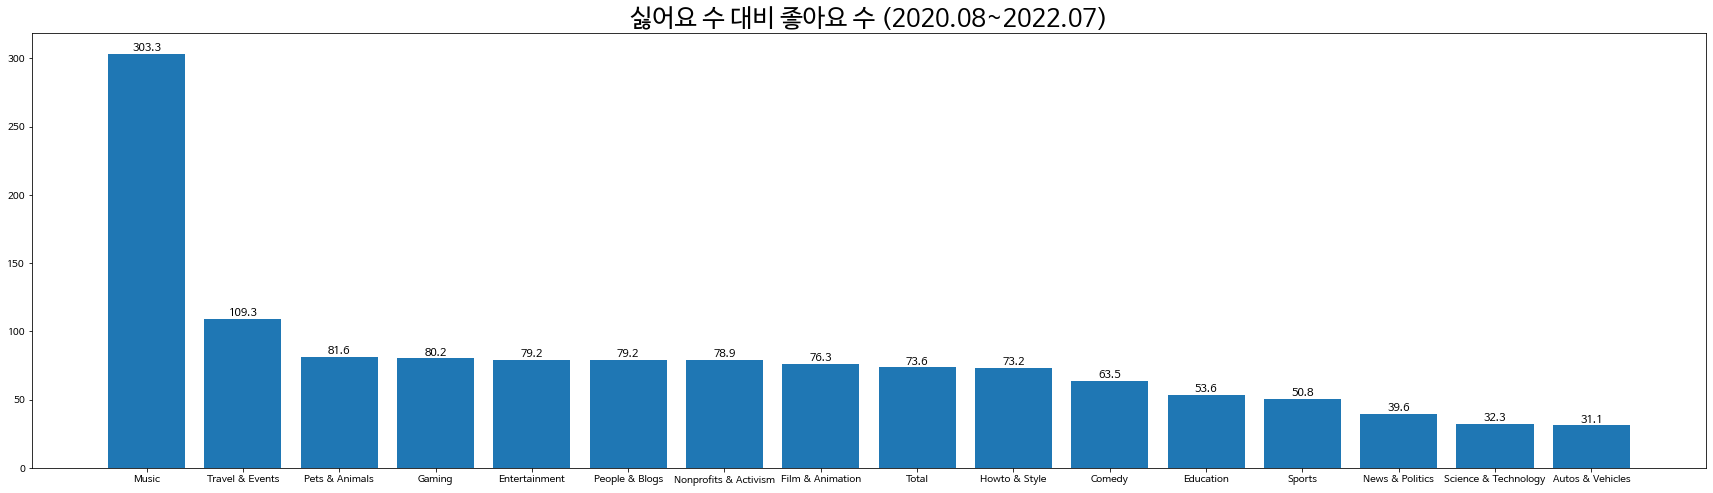

In [60]:
df_med['likes_div_dislikes'] = df_med['likes']/df_med['dislikes']
likesdislikes_sort = df_med.sort_values('likes_div_dislikes',ascending = False)[['category_name','likes_div_dislikes']]

plt.figure(figsize=(30,8))
x = np.arange(len(likesdislikes_sort.category_name.unique()))
a = plt.bar(x, height = likesdislikes_sort['likes_div_dislikes']) #color= #edgecolot = 
plt.xticks(x, likesdislikes_sort['category_name'], fontsize = 10)
plt.title('싫어요 수 대비 좋아요 수 (2020.08~2022.07)',fontsize = 25)
for rect in a:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 11)
plt.show()

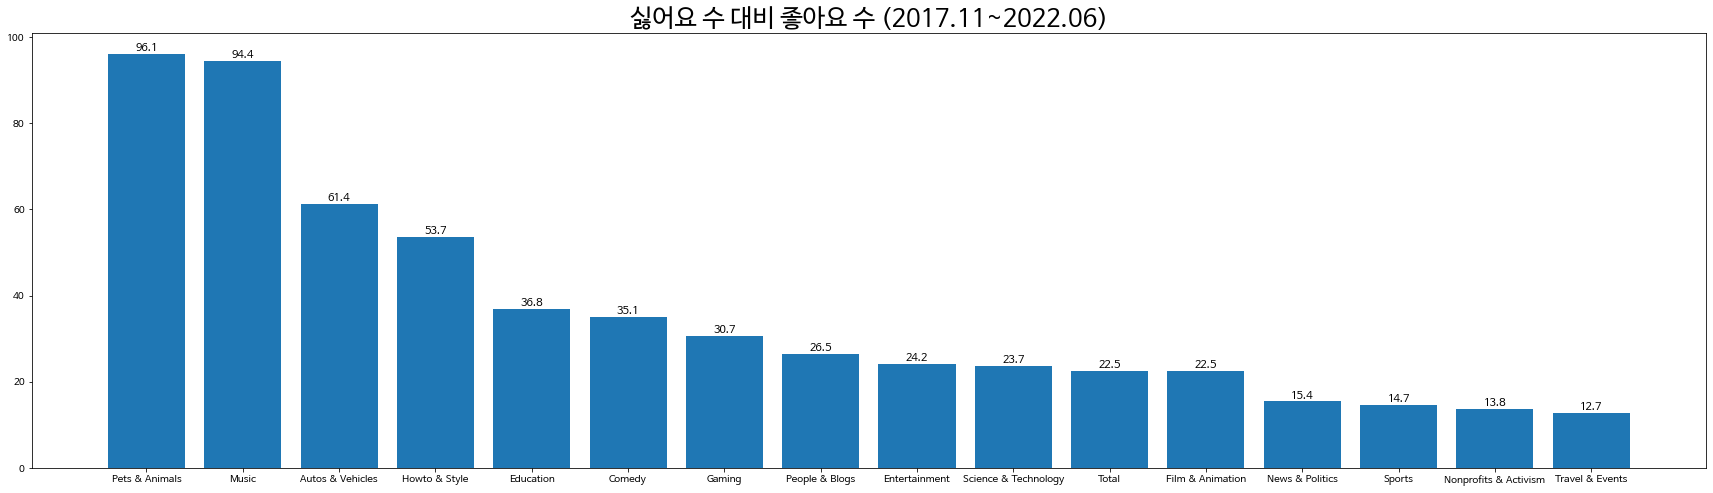

In [61]:
df_2017_med['likes_div_dislikes'] = df_2017_med['likes']/df_2017_med['dislikes']
likesdislikes_sort = df_2017_med.sort_values('likes_div_dislikes',ascending = False)[['category_name','likes_div_dislikes']]

plt.figure(figsize=(30,8))
x = np.arange(len(likesdislikes_sort.category_name.unique()))
a = plt.bar(x, height = likesdislikes_sort['likes_div_dislikes']) #color= #edgecolot = 
plt.xticks(x, likesdislikes_sort['category_name'], fontsize = 10)
plt.title('싫어요 수 대비 좋아요 수 (2017.11~2022.06)',fontsize = 25)
for rect in a:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 11)
plt.show()

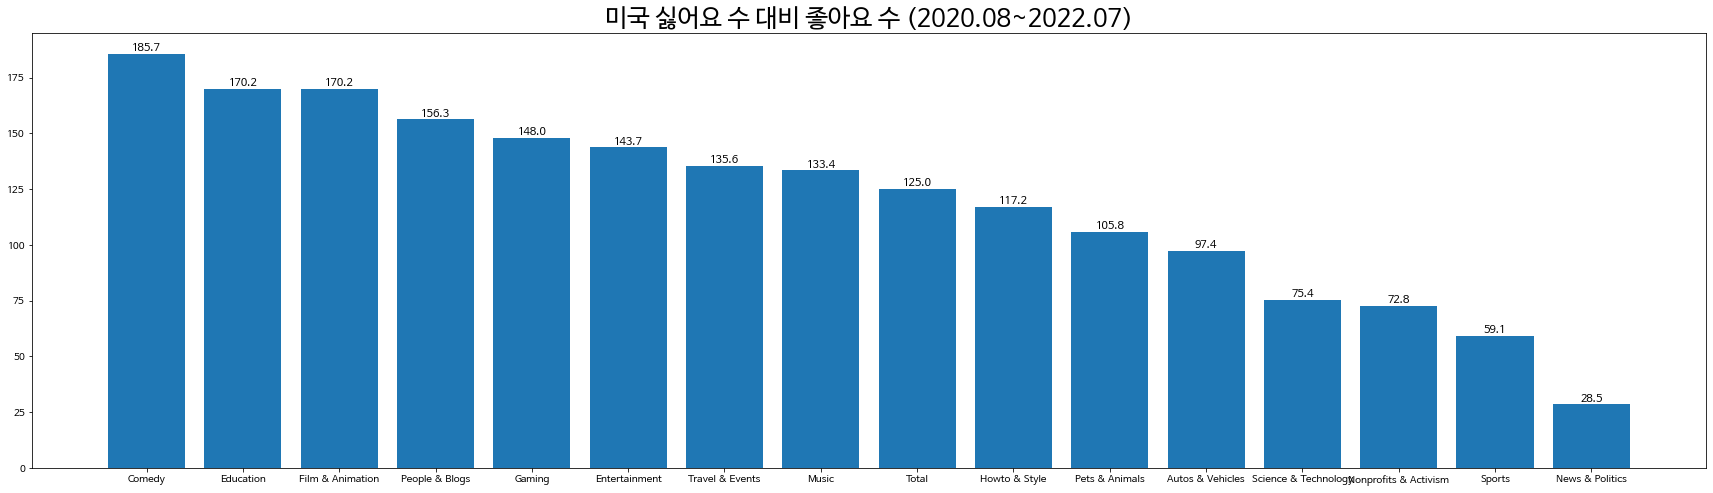

In [62]:
df_us_med['likes_div_dislikes'] = df_us_med['likes']/df_us_med['dislikes']
likesdislikes_sort = df_us_med.sort_values('likes_div_dislikes',ascending = False)[['category_name','likes_div_dislikes']]

plt.figure(figsize=(30,8))
x = np.arange(len(likesdislikes_sort.category_name.unique()))
a = plt.bar(x, height = likesdislikes_sort['likes_div_dislikes']) #color= #edgecolot = 
plt.xticks(x, likesdislikes_sort['category_name'], fontsize = 10)
plt.title('미국 싫어요 수 대비 좋아요 수 (2020.08~2022.07)',fontsize = 25)
for rect in a:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 11)
plt.show()

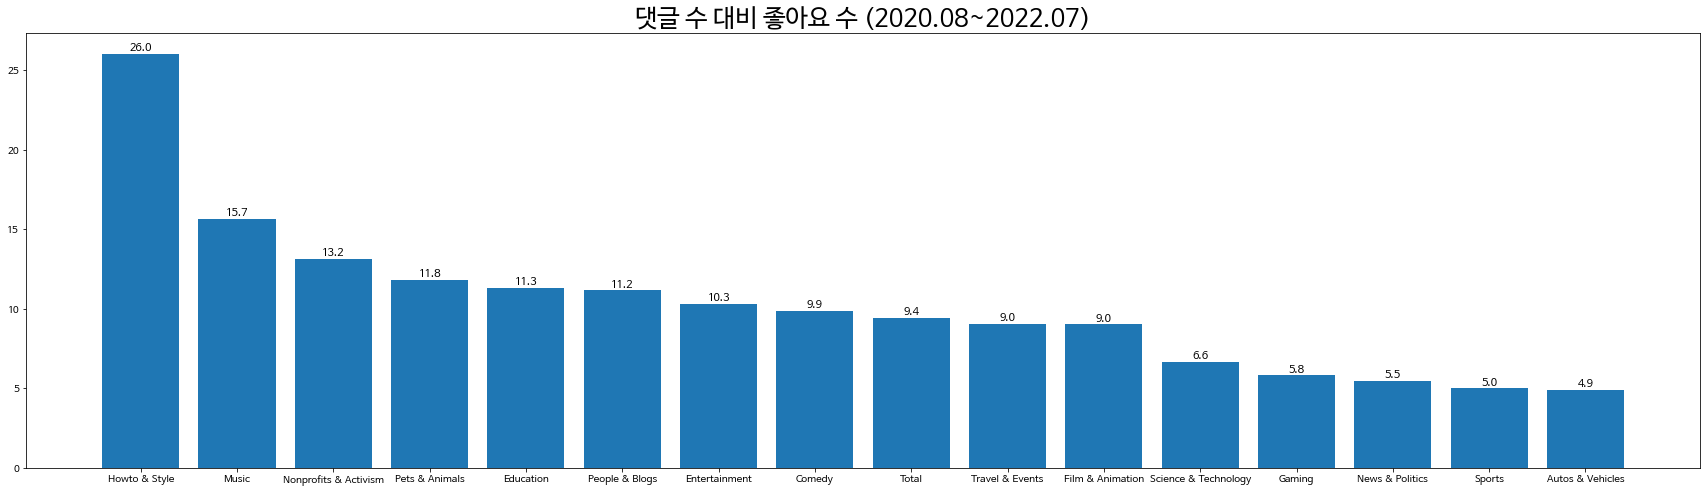

In [63]:
df_med['likes_div_comment'] = df_med['likes']/df_med['comment_count']
likescomment_sort = df_med.sort_values('likes_div_comment',ascending = False)[['category_name','likes_div_comment']]

plt.figure(figsize=(30,8))
x = np.arange(len(likescomment_sort.category_name.unique()))
a = plt.bar(x, height = likescomment_sort['likes_div_comment']) #color= #edgecolot = 
plt.xticks(x, likescomment_sort['category_name'], fontsize = 10)
plt.title('댓글 수 대비 좋아요 수 (2020.08~2022.07)',fontsize = 25)
for rect in a:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 11)
plt.show()

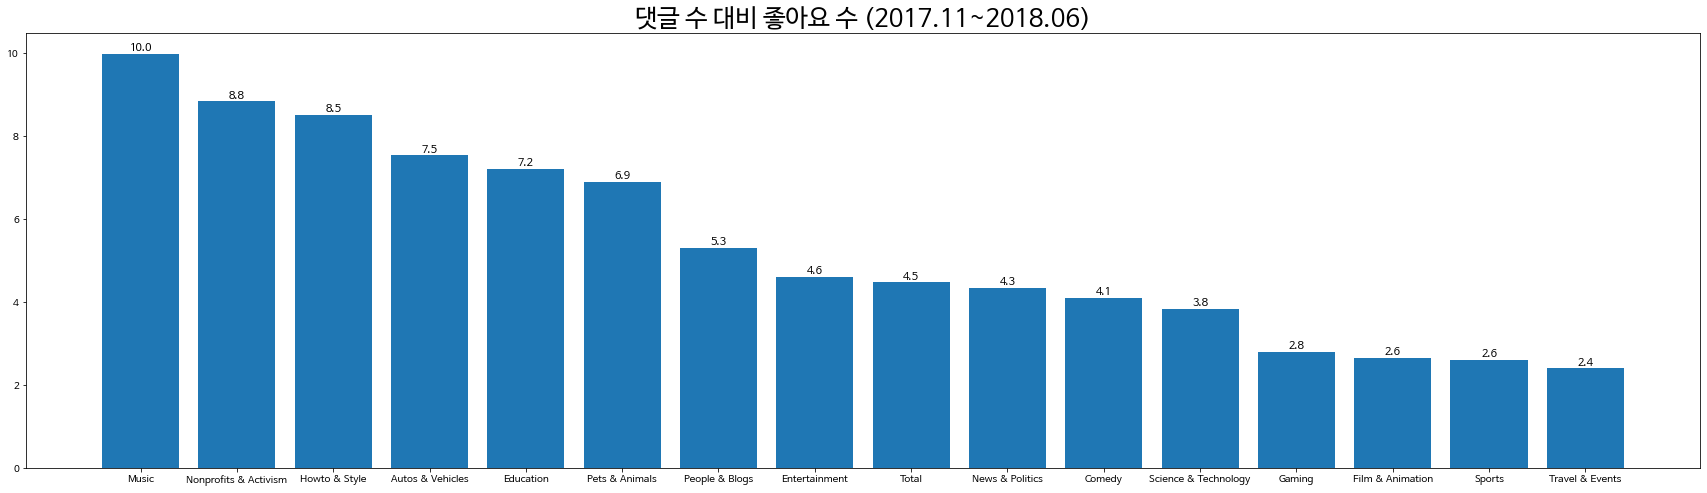

In [64]:
df_2017_med['likes_div_comment'] = df_2017_med['likes']/df_2017_med['comment_count']
likescomment_sort = df_2017_med.sort_values('likes_div_comment',ascending = False)[['category_name','likes_div_comment']]

plt.figure(figsize=(30,8))
x = np.arange(len(likescomment_sort.category_name.unique()))
a = plt.bar(x, height = likescomment_sort['likes_div_comment']) #color= #edgecolot = 
plt.xticks(x, likescomment_sort['category_name'], fontsize = 10)
plt.title('댓글 수 대비 좋아요 수 (2017.11~2018.06)',fontsize = 25)
for rect in a:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 11)
plt.show()

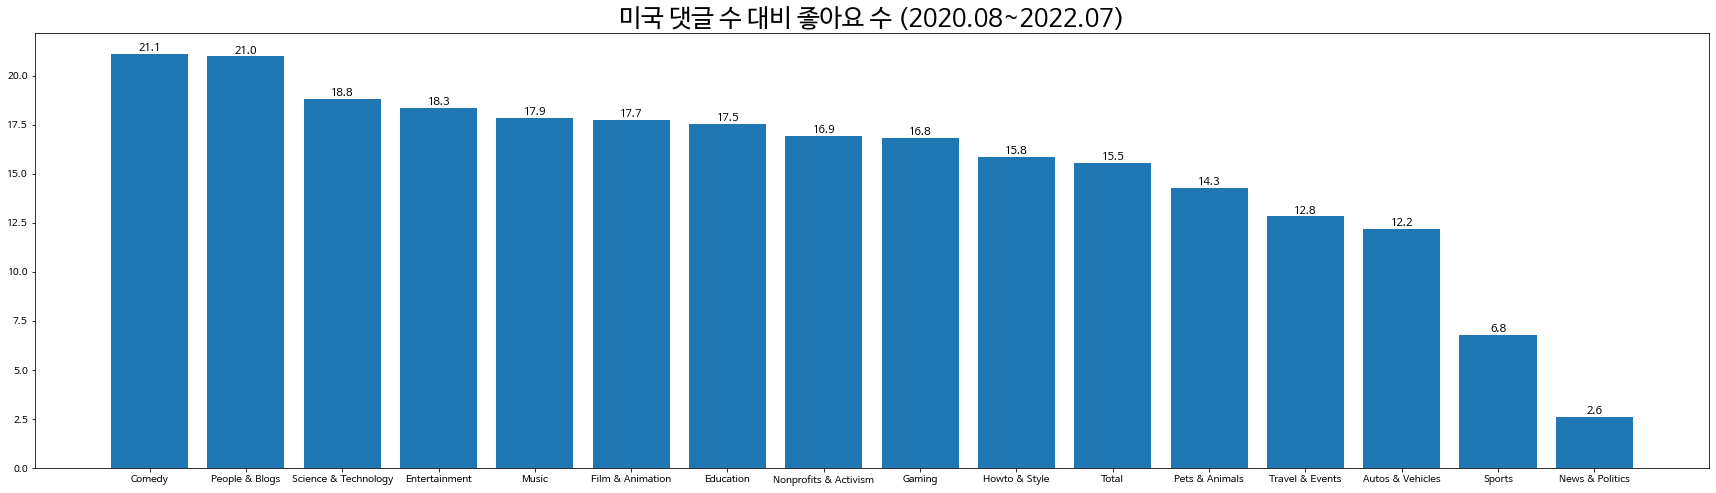

In [65]:
df_us_med['likes_div_comment'] = df_us_med['likes']/df_us_med['comment_count']
likescomment_sort = df_us_med.sort_values('likes_div_comment',ascending = False)[['category_name','likes_div_comment']]

plt.figure(figsize=(30,8))
x = np.arange(len(likescomment_sort.category_name.unique()))
a = plt.bar(x, height = likescomment_sort['likes_div_comment']) #color= #edgecolot = 
plt.xticks(x, likescomment_sort['category_name'], fontsize = 10)
plt.title('미국 댓글 수 대비 좋아요 수 (2020.08~2022.07)',fontsize = 25)
for rect in a:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 11)
plt.show()

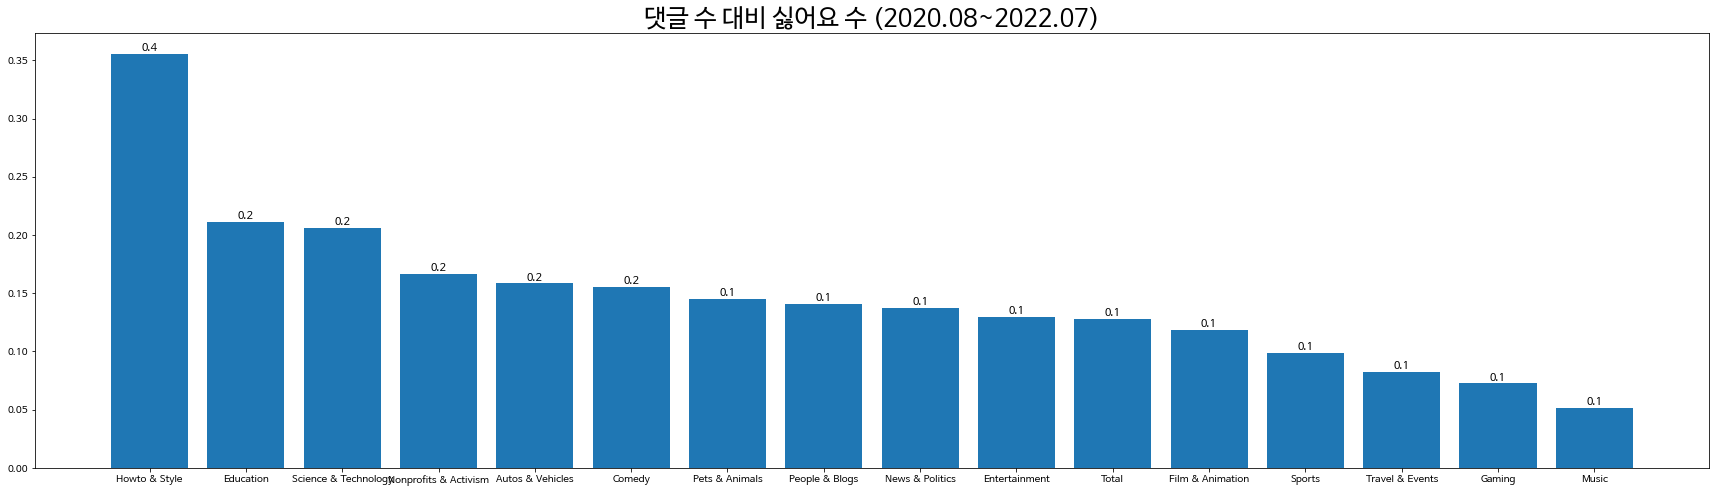

In [66]:
df_med['dislikes_div_comment'] = df_med['dislikes']/df_med['comment_count']
dislikescomment_sort = df_med.sort_values('dislikes_div_comment',ascending = False)[['category_name','dislikes_div_comment']]

plt.figure(figsize=(30,8))
x = np.arange(len(dislikescomment_sort.category_name.unique()))
a = plt.bar(x, height = dislikescomment_sort['dislikes_div_comment']) #color= #edgecolot = 
plt.xticks(x, dislikescomment_sort['category_name'], fontsize = 10)
plt.title('댓글 수 대비 싫어요 수 (2020.08~2022.07)',fontsize = 25)
for rect in a:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 11)
plt.show()

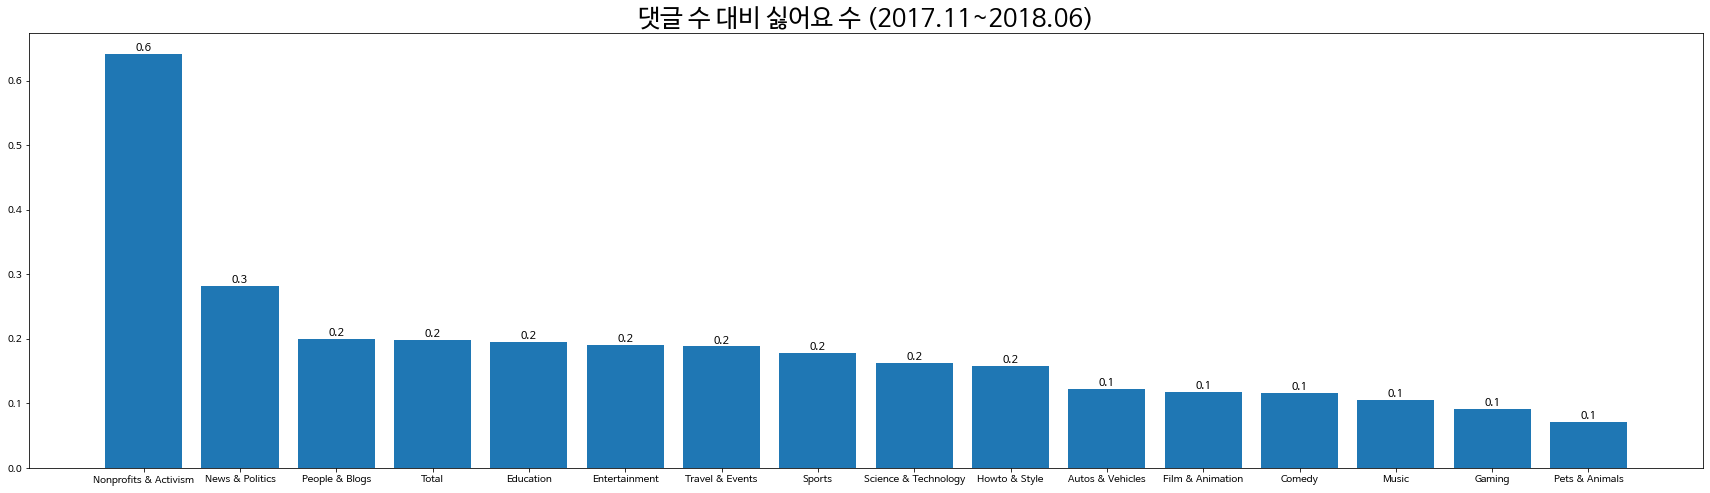

In [67]:
df_2017_med['dislikes_div_comment'] = df_2017_med['dislikes']/df_2017_med['comment_count']
dislikescomment_sort = df_2017_med.sort_values('dislikes_div_comment',ascending = False)[['category_name','dislikes_div_comment']]

plt.figure(figsize=(30,8))
x = np.arange(len(dislikescomment_sort.category_name.unique()))
a = plt.bar(x, height = dislikescomment_sort['dislikes_div_comment']) #color= #edgecolot = 
plt.xticks(x, dislikescomment_sort['category_name'], fontsize = 10)
plt.title('댓글 수 대비 싫어요 수 (2017.11~2018.06)',fontsize = 25)
for rect in a:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 11)
plt.show()

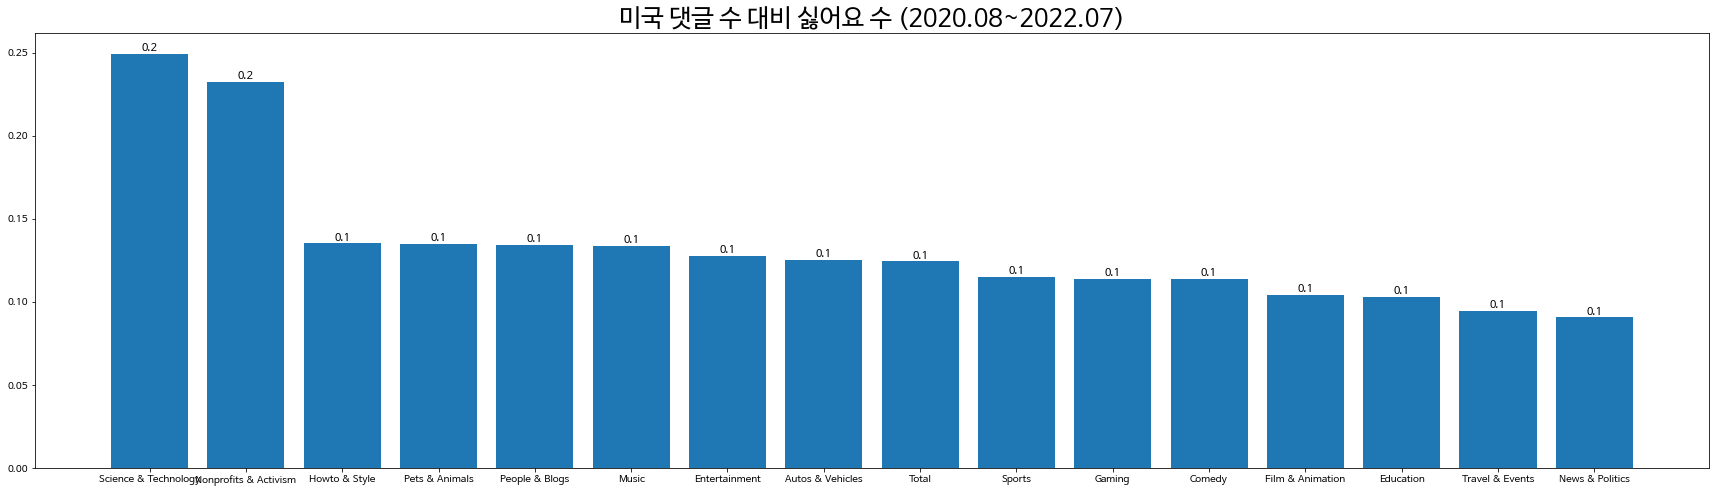

In [68]:
df_us_med['dislikes_div_comment'] = df_us_med['dislikes']/df_us_med['comment_count']
dislikescomment_sort = df_us_med.sort_values('dislikes_div_comment',ascending = False)[['category_name','dislikes_div_comment']]

plt.figure(figsize=(30,8))
x = np.arange(len(dislikescomment_sort.category_name.unique()))
a = plt.bar(x, height = dislikescomment_sort['dislikes_div_comment']) #color= #edgecolot = 
plt.xticks(x, dislikescomment_sort['category_name'], fontsize = 10)
plt.title('미국 댓글 수 대비 싫어요 수 (2020.08~2022.07)',fontsize = 25)
for rect in a:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 11)
plt.show()

In [69]:
df_med

,category_name,view_count,likes,dislikes,comment_count,tag_num,period,view_div_likes,view_div_dislikes,view_div_comment,likes_div_dislikes,likes_div_comment,dislikes_div_comment
0,Autos & Vehicles,501041.0,4614.5,148.5,937.5,13.0,8.0,108.579694,3374.013468,534.443733,31.074074,4.922133,0.158400
1,Comedy,776137.0,13493.0,212.5,1366.0,10.0,9.0,57.521456,3652.409412,568.182284,63.496471,9.877745,0.155564
2,Education,458622.0,9803.0,183.0,867.0,13.0,8.0,46.783842,2506.131148,528.975779,53.568306,11.306805,0.211073
3,Entertainment,770633.0,12360.0,156.0,1200.0,18.0,8.0,62.348948,4939.955128,642.194167,79.230769,10.300000,0.130000
4,Film & Animation,824596.0,15491.0,203.0,1717.0,8.0,8.0,53.230650,4062.049261,480.253931,76.310345,9.022132,0.118229
5,Gaming,517088.0,7541.0,94.0,1296.0,14.0,8.0,68.570216,5500.936170,398.987654,80.223404,5.818673,0.072531
6,Howto & Style,627677.0,10912.0,149.0,419.0,11.0,9.0,57.521719,4212.597315,1498.035800,73.234899,26.042959,0.355609
7,Music,1230380.0,61883.0,204.0,3948.0,14.0,8.0,19.882359,6031.274510,311.646403,303.348039,15.674519,0.051672
8,News & Politics,577256.0,8749.0,221.0,1605.0,13.0,6.0,65.979655,2612.018100,359.661059,39.588235,5.451090,0.137695
9,Nonprofits & Activism,398342.5,8359.5,106.0,635.5,11.0,8.0,47.651474,3757.948113,626.817467,78.863208,13.154209,0.166798


In [70]:
df_2017_med

,category_name,view_count,likes,dislikes,comment_count,tag_num,period,view_div_likes,view_div_dislikes,view_div_comment,likes_div_dislikes,likes_div_comment,dislikes_div_comment
0,Autos & Vehicles,29373.0,1043.0,17.0,138.5,7.0,2.0,28.162033,1727.823529,212.079422,61.352941,7.530686,0.122744
1,Comedy,235125.0,3297.0,94.0,806.0,19.0,2.0,71.314832,2501.329787,291.718362,35.074468,4.090571,0.116625
2,Education,39681.0,957.0,26.0,133.0,10.0,2.0,41.463950,1526.192308,298.353383,36.807692,7.195489,0.195489
3,Entertainment,121858.5,1500.0,62.0,326.0,12.0,2.0,81.239000,1965.459677,373.799080,24.193548,4.601227,0.190184
4,Film & Animation,144516.5,989.0,44.0,373.5,12.0,2.0,146.123862,3284.465909,386.925033,22.477273,2.647925,0.117805
5,Gaming,92159.0,1349.5,44.0,482.5,15.0,2.0,68.291219,2094.522727,191.003109,30.670455,2.796891,0.091192
6,Howto & Style,104180.0,2415.0,45.0,284.0,15.0,2.0,43.138716,2315.111111,366.830986,53.666667,8.503521,0.158451
7,Music,200105.0,7125.5,75.5,714.0,11.0,2.0,28.082942,2650.397351,280.259104,94.377483,9.979692,0.105742
8,News & Politics,70390.0,1142.5,74.0,263.0,8.0,2.0,61.610503,951.216216,267.642586,15.439189,4.344106,0.281369
9,Nonprofits & Activism,43595.0,468.0,34.0,53.0,16.0,2.0,93.151709,1282.205882,822.547170,13.764706,8.830189,0.641509


In [71]:
df_us_med

,category_name,view_count,likes,dislikes,comment_count,tag_num,period,view_div_likes,view_div_dislikes,view_div_comment,likes_div_dislikes,likes_div_comment,dislikes_div_comment
0,Autos & Vehicles,787064.0,33249.0,341.5,2726.5,16.5,5.0,23.671810,2304.726208,288.671924,97.361640,12.194755,0.125252
1,Comedy,1146182.0,75782.0,408.0,3589.0,13.0,5.0,15.124726,2809.269608,319.359710,185.740196,21.115074,0.113681
2,Education,1273469.0,67381.0,396.0,3845.0,11.0,5.0,18.899527,3215.830808,331.201300,170.154040,17.524317,0.102991
3,Entertainment,1297953.0,57349.0,399.0,3127.0,15.0,5.0,22.632531,3253.015038,415.079309,143.731830,18.339942,0.127598
4,Film & Animation,1251353.5,62785.5,369.0,3541.5,14.0,5.0,19.930613,3391.201897,353.339969,170.150407,17.728505,0.104193
5,Gaming,1094762.0,50026.0,338.0,2972.0,17.0,5.0,21.883860,3238.940828,368.358681,148.005917,16.832436,0.113728
6,Howto & Style,854271.0,47095.0,402.0,2974.0,15.0,5.0,18.139314,2125.052239,287.246469,117.151741,15.835575,0.135171
7,Music,1825587.0,98988.0,742.0,5545.0,17.0,5.0,18.442508,2460.359838,329.231199,133.407008,17.851758,0.133814
8,News & Politics,733416.0,7401.0,260.0,2870.0,9.0,5.0,99.096879,2820.830769,255.545645,28.465385,2.578746,0.090592
9,Nonprofits & Activism,1155096.0,67438.0,926.5,3985.5,6.0,5.0,17.128266,1246.730707,289.824614,72.787911,16.920838,0.232468


In [72]:
df_med.to_csv("C:\\Users\\lsj32\\Desktop\\DSL\\DSL_2\\EDA\\키워드분석\\df_med.csv", index=False)
df_2017_med.to_csv("C:\\Users\\lsj32\\Desktop\\DSL\\DSL_2\\EDA\\키워드분석\\df_2017_med.csv",index=False)
df_us_med.to_csv("C:\\Users\\lsj32\\Desktop\\DSL\\DSL_2\\EDA\\키워드분석\\df_us_med.csv",index=False)



---



---

